<a id='1'></a>
<h2 style="font-family: serif; font-size: 35px; background-color: #f6f6f6; color: black; font-weight: bold; border-radius: 100px 100px; text-align: center">
    A Wearable Exam Stress Dataset for Predicting Cognitive Performance in Real-World Settings
</h2>


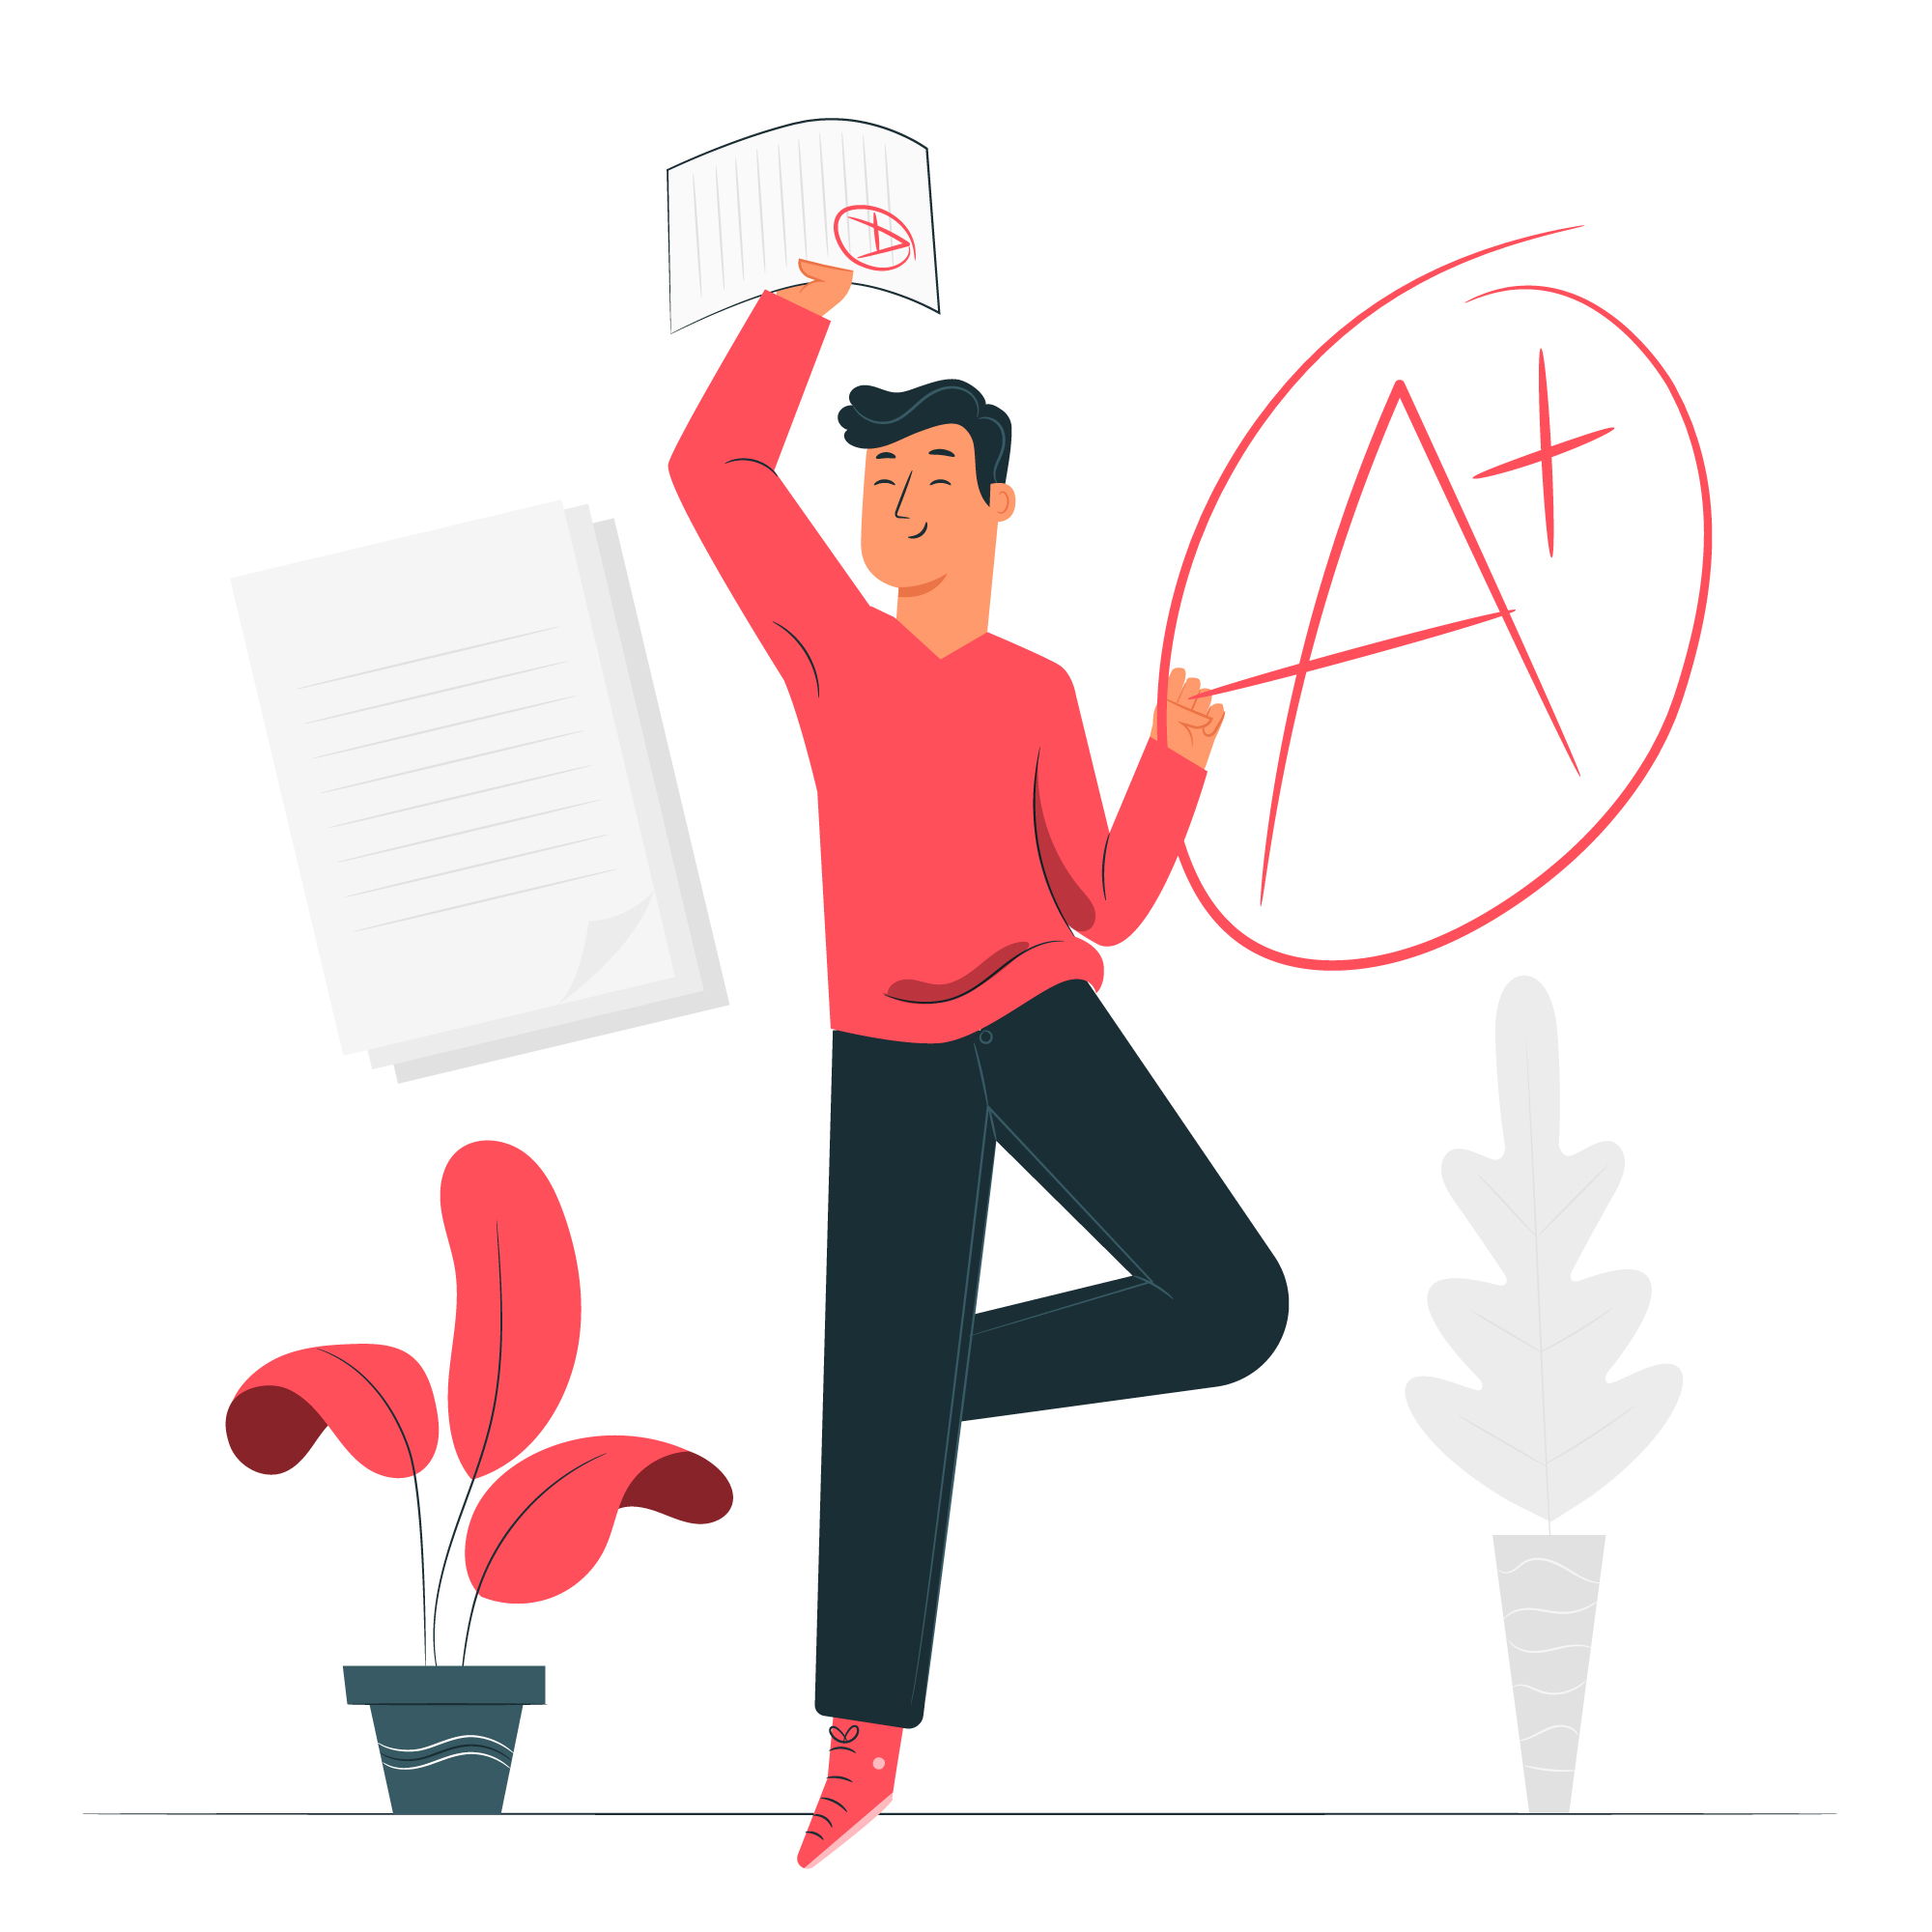

In [2]:
from IPython.display import Image

image_path = '/Users/mayaravi/Downloads/7125686_3497819.jpg'

Image(image_path)

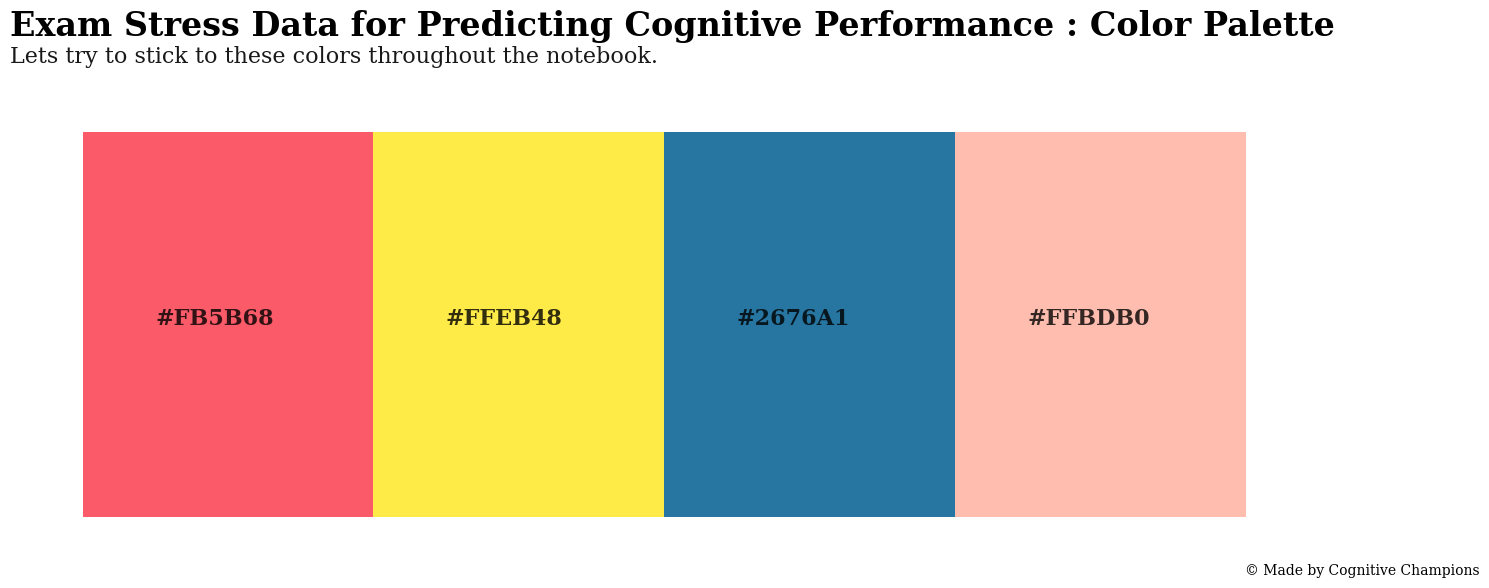

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0']

sns.palplot(colors,size = 3)

plt.gcf().set_size_inches(15,5)

plt.text(-0.75,-0.75, 'Exam Stress Data for Predicting Cognitive Performance : Color Palette',{'fontfamily':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.68, 'Lets try to stick to these colors throughout the notebook.',{'fontfamily':'serif', 'size':16},alpha = 0.9)
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'serif', 'size':16, 'weight':'bold','color':'black'}, alpha =0.8)
plt.gcf().set_facecolor('white')
plt.box(None)
plt.axis('off')
plt.text(3.5,0.65,'© Made by Cognitive Champions',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.show()


<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #D9042B; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.1 Libraries and Utilities</h2>

In [46]:
# Basic Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime 
from collections import Counter
import re 
import random

# Visualization Modules
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from pywaffle import Waffle

#modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

# Date and Time Utilities
from dateutil.relativedelta import relativedelta

# Machine Learning Preprocessing
from sklearn.preprocessing import LabelEncoder

# Additional Setup (Note: Run this line separately in your Jupyter Notebook)
!conda install -c conda-forge wordcloud -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.



<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #D9042B; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.2 Data Loading and Pre Processing  </h2>

In [10]:
file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'

grades_df = pd.read_excel(file_path, 'Grades')
demography_df = pd.read_excel(file_path, 'Demography')
eda_df = pd.read_excel(file_path, 'EDA')
hr_df = pd.read_excel(file_path, 'HR')
temp_df = pd.read_excel(file_path, 'Temp')
ibi_df = pd.read_excel(file_path, 'IBI')


In [11]:
def standardize_column_names(df):
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
    df.columns = df.columns.str.lower()  # Convert to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    return df

def standardize_student_ids(df, id_column):
    if id_column in df.columns:
        df[id_column] = df[id_column].str.upper().str.zfill(4)
    return df

dfs = [grades_df, demography_df, eda_df, hr_df, temp_df, ibi_df]

for df in dfs:
    df.dropna(inplace=True)
  
    df = standardize_column_names(df)
    
    df = standardize_student_ids(df, 'Student_id')


<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color: #D9042B; border-radius: 100px 100px; text-align: center;">Table of Contents</h1>

* [1. Academic Performance Analysis](#academic-performance-analysis)
* [2. Physiological Data Analysis](#physiological-data-analysis)
* [3. Demographics Data Analysis](#demographics-data-analysis)
* [4. Exploring Plotly library and Visualizations](#exploring-plotly-library)
* [5. Research Question - How (EDA, HR, TEMP, IBI) correlate with students' academic performance?](#research-question-physiological-academic-correlation)
* [6. Research Question - Does longer exam hours mean more stress in students?](#exam-hours-stress-correlation)
* [7. Research Question - Analyzing the Relationship Between Stress Levels (as Indicated by EDA) and Student Grades?](#exam-hours-stress-correlation)
* [8. Predictive modeling and Machine learning models](##predictive-modelling-machine-learning)


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="academic-performance-analysis"></a>1. Academic Performance Analysis
</h3>


<p style="color: #00008B; font-size: 20px">1. What is the average score improvement from Midterm 1 to Midterm 2?</p>

<p style="color: #00008B; font-size: 20px">2. How do final exam scores correlate with the average of Midterm 1 and 2 scores?</p>

<p style="color: #00008B; font-size: 20px">3. Identify the student with the most consistent performance across all exams.</p>

<p style="color: #00008B; font-size: 20px">4. What percentage of students improved their scores in the final exam compared to the midterms?</p>

<p style="color: #00008B; font-size: 20px">5. Visualize the distribution of total scores (Midterm 1, Midterm 2, and Final) for each student.</p>

<p style="color: #00008B; font-size: 20px">6. Analyze the variance in Midterm and Final exam scores.</p>

<p style="color: #00008B; font-size: 20px">7. Rank students based on their overall academic performance (total of all exam scores).</p>

<p style="color: #00008B; font-size: 20px">8. Which exam had the highest average score and which had the lowest?</p>

<p style="color: #00008B; font-size: 20px">9. Determine if there is a general trend of score improvement or decline from Midterm 1 to the Final.</p>

<p style="color: #00008B; font-size: 20px">10. Compare the highest and lowest scores for each exam type.</p>

<p style="color: #00008B; font-size: 20px">11. Complete Student Profile for midterm 1 , midterm 2 , midterm 3 </p>

<p style="color: #00008B; font-size: 20px">12. Descriptive Statistics Of students grades in exams</p>

<p style="color: #00008B; font-size: 20px">13. Identify students whose score in any exam is an outlier (using statistical methods) </p>

<p style="color: #00008B; font-size: 20px">14. List students whose final score improved from their Midterm 1 score by at least 20%. </p>

<p style="color: #00008B; font-size: 20px">15. Determine the percentage of students who improved their score from Midterm 1 to Midterm 2.  </p>


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/135241454.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Student_id', y='Total (%)', data=df_grades, palette=custom_palette)
/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/135241454.py:40: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Student_id', y='Total (%)', data=df_grades, palette=custom_palette)


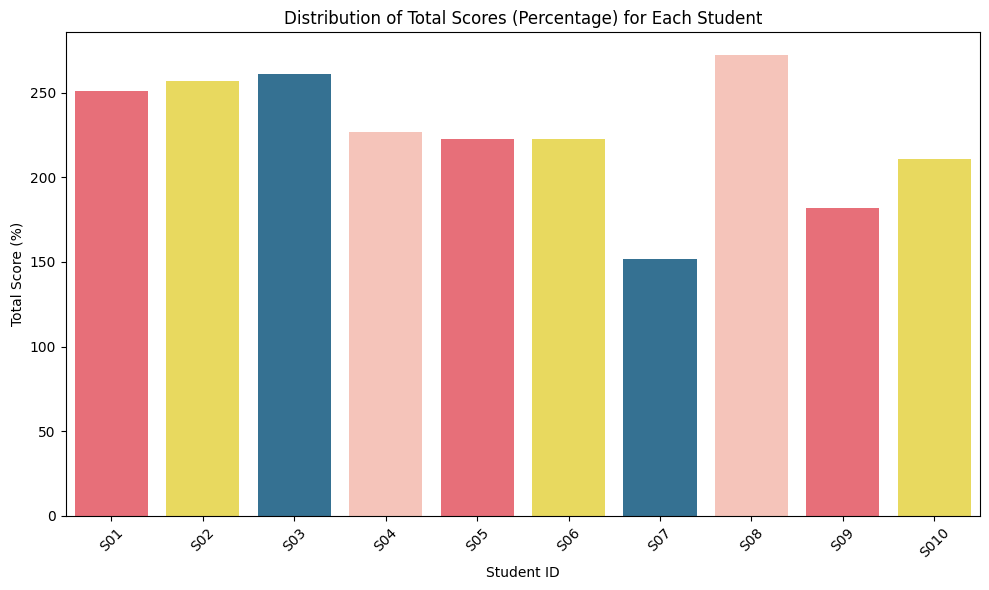

1. Average Score Improvement from Midterm 1 to Midterm 2: -7.60%
2. Correlation between Final Exam Scores and Average of Midterm Scores: 0.75
3. Most Consistent Student Across All Exams: S04
4. Percentage of Students Improved in Final Exam: 80.00%
6. Variance in Midterm 1 Scores: 78.94
   Variance in Midterm 2 Scores: 399.21
   Variance in Final Exam Scores: 224.50
7. Ranked Students Based on Overall Performance:
 S08
 S03
 S02
 S01
 S04
 S05
 S06
S010
 S09
 S07

8. Exam with Highest and Lowest Average Score:
   Highest Average Score: Final (%)
   Lowest Average Score: Midterm 2 (%)

9. General Trend of Score Improvement or Decline from Midterm 1 to Final:
   General Trend: 0.85%

10. Highest and Lowest Scores for Each Exam Type:
   Highest Scores for Each Exam:
Midterm 1 (%)    92.0
Midterm 2 (%)    90.0
Final (%)        94.0
dtype: float64

   Lowest Scores for Each Exam:
Midterm 1 (%)    64.0
Midterm 2 (%)    33.0
Final (%)        55.0
dtype: float64


In [14]:
xls = pd.ExcelFile(file_path)
sheets_data = {sheet_name: pd.read_excel(xls, sheet_name) for sheet_name in xls.sheet_names}

# Define custom color palette
custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']

xls = pd.ExcelFile(file_path)
sheets_data = {sheet_name: pd.read_excel(xls, sheet_name) for sheet_name in xls.sheet_names}

sheets_data['Grades']['Student_id'] = sheets_data['Grades']['Student_id'].str.replace('S10', 'S010', regex=False)

df_grades = sheets_data['Grades']

df_grades['Midterm 1 (%)'] = (df_grades['Midterm 1'] / 100) * 100
df_grades['Midterm 2 (%)'] = (df_grades['Midterm 2'] / 100) * 100
df_grades['Final (%)'] = (df_grades['final'] / 200) * 100

df_grades['Total (%)'] = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)', 'Final (%)']].sum(axis=1)

df_grades['Score_Improvement'] = df_grades['Midterm 2 (%)'] - df_grades['Midterm 1 (%)']
df_grades['Midterm_Average (%)'] = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)']].mean(axis=1)
df_grades['Score_STD'] = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)', 'Final (%)']].std(axis=1)


# Q1. Average score improvement from Midterm 1 to Midterm 2
avg_score_improvement = df_grades['Score_Improvement'].mean()

# Q2. Correlation between final exam scores and average of Midterm 1 and 2 scores
correlation_final_midterm_avg = df_grades[['Final (%)', 'Midterm_Average (%)']].corr().iloc[0, 1]

# Q3. Most Consistent Student Across All Exams
most_consistent_student = df_grades[df_grades['Score_STD'] == df_grades['Score_STD'].min()]['Student_id'].iloc[0]

# Q4. Percentage of Students Improved in Final Exam
improved_in_final = df_grades[df_grades['Final (%)'] > df_grades['Midterm_Average (%)']].shape[0]
percentage_improved_final = (improved_in_final / df_grades.shape[0]) * 100

# Q5. Visualization of Total Scores for Each Student
plt.figure(figsize=(10, 6))
sns.barplot(x='Student_id', y='Total (%)', data=df_grades, palette=custom_palette)
plt.title('Distribution of Total Scores (Percentage) for Each Student')
plt.xlabel('Student ID')
plt.ylabel('Total Score (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q6. Variance in Midterm and Final exam scores
variance_midterm_1 = df_grades['Midterm 1 (%)'].var()
variance_midterm_2 = df_grades['Midterm 2 (%)'].var()
variance_final = df_grades['Final (%)'].var()

# Q7. Rank students based on their overall academic performance
ranked_students = df_grades.sort_values(by='Total (%)', ascending=False)['Student_id']

# Q8. Which exam had the highest average score and which had the lowest?
average_scores_per_exam = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)', 'Final (%)']].mean()
highest_avg_exam = average_scores_per_exam.idxmax()
lowest_avg_exam = average_scores_per_exam.idxmin()

# Q9. General trend of score improvement or decline from Midterm 1 to the Final
score_change_midterm_final = df_grades['Final (%)'] - df_grades['Midterm 1 (%)']
general_trend_midterm_final = score_change_midterm_final.mean()

# Q10. Compare the highest and lowest scores for each exam type
highest_scores_per_exam = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)', 'Final (%)']].max()
lowest_scores_per_exam = df_grades[['Midterm 1 (%)', 'Midterm 2 (%)', 'Final (%)']].min()

print(f"1. Average Score Improvement from Midterm 1 to Midterm 2: {avg_score_improvement:.2f}%")
print(f"2. Correlation between Final Exam Scores and Average of Midterm Scores: {correlation_final_midterm_avg:.2f}")
print(f"3. Most Consistent Student Across All Exams: {most_consistent_student}")
print(f"4. Percentage of Students Improved in Final Exam: {percentage_improved_final:.2f}%")
print(f"6. Variance in Midterm 1 Scores: {variance_midterm_1:.2f}")
print(f"   Variance in Midterm 2 Scores: {variance_midterm_2:.2f}")
print(f"   Variance in Final Exam Scores: {variance_final:.2f}")
print("7. Ranked Students Based on Overall Performance:")
print(ranked_students.to_string(index=False))

print("\n8. Exam with Highest and Lowest Average Score:")
print(f"   Highest Average Score: {highest_avg_exam}")
print(f"   Lowest Average Score: {lowest_avg_exam}")

print("\n9. General Trend of Score Improvement or Decline from Midterm 1 to Final:")
print(f"   General Trend: {general_trend_midterm_final:.2f}%")

print("\n10. Highest and Lowest Scores for Each Exam Type:")
print("   Highest Scores for Each Exam:")
print(highest_scores_per_exam)
print("\n   Lowest Scores for Each Exam:")
print(lowest_scores_per_exam)


<p style="color: #008000; font-size: 20px"> Overall Insights from the Analysis</p>

<ul>
    <li><p style="color: #008000; font-size: 17px">Performance Decline in Midterms: Theres a noticeable decline in performance from Midterm 1 to Midterm 2, indicating a potential increase in difficulty level or a dip in student preparation.</p></li>
    <li><p style="color: #008000; font-size: 17px">Strong Correlation with Final Exam: The strong correlation between midterm scores and the final exam suggests consistent performance patterns among students throughout the academic period.</p></li>
    <li><p style="color: #008000; font-size: 17px">Consistent Performance by a Student: One student (S04) showed remarkable consistency across all exams, indicating a stable and possibly well-balanced approach to their studies.</p></li>
    <li><p style="color: #008000; font-size: 17px">Significant Improvement in Final Exam: A significant majority (80%) of the students improved their scores in the final exam, which could indicate effective end-term revision strategies or a comparatively easier final exam.</p></li>
    <li><p style="color: #008000; font-size: 17px">Variability in Scores: The variance in scores shows significant differences in student performance, especially in Midterm 2, suggesting a diverse range of understanding and preparedness among the students.</p></li>
    <li><p style="color: #008000; font-size: 17px">Ranking Reveals Top Performers: The ranking of students based on overall performance highlights top achievers and potentially helps in identifying students needing additional support.</p></li>
    <li><p style="color: #008000; font-size: 17px">Exams Scoring Trends: The final exam had the highest average score, suggesting either a better grasp of the material by the end of the course or a different exam structure (like more practical or applied questions) compared to the midterms.</p></li>
</ul>


In [59]:
#Q 11 Complete student Profile 

grades_data = pd.read_excel(file_path, sheet_name='Grades')
demography_data = pd.read_excel(file_path, sheet_name='Demography')
eda_data = pd.read_excel(file_path, sheet_name='EDA')
hr_data = pd.read_excel(file_path, sheet_name='HR')
temp_data = pd.read_excel(file_path, sheet_name='Temp')
ibi_data = pd.read_excel(file_path, sheet_name='IBI')

def standardize_student_id_column(df):
    df.columns = [col.replace('Student ID', 'Student_id') for col in df.columns]
    if 'Student_id' in df.columns:
        df['Student_id'] = df['Student_id'].str.upper().replace('S010', 'S10')
    return df

def handle_nan_values(df):
    for col in df.columns:
        if df[col].dtype.name == 'category':
            if 'Unknown' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories('Unknown')
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(0, inplace=True)
    return df

for sheet_name, df in all_sheets.items():
    df = standardize_student_id_column(df)
    df = handle_nan_values(df)
    all_sheets[sheet_name] = df

eda_data['Student_id'] = eda_data['Student_id'].replace('S010', 'S10')
hr_data['Student_id'] = hr_data['Student_id'].replace('S010', 'S10')
temp_data['Student_id'] = temp_data['Student_id'].replace('S010', 'S10')
ibi_data['Student_id'] = ibi_data['Student_id'].replace('S010', 'S10')

hr_data['Exam'] = hr_data['Exam'].str.lower()
temp_data['Exam'] = temp_data['Exam'].str.lower()

#Average physiological data for each student for each exam period
avg_eda_exam = eda_data.groupby(['Student_id', 'Exam'])['EDA'].mean().reset_index()
avg_hr_exam = hr_data.groupby(['Student_id', 'Exam'])['HR'].mean().reset_index()
avg_temp_exam = temp_data.groupby(['Student_id', 'Exam'])['TEMP'].mean().reset_index()
avg_ibi_exam = ibi_data.groupby(['Student_id', 'Exam'])['IBI'].mean().reset_index()

eda_data.fillna(0, inplace=True)
hr_data.fillna(0, inplace=True)
temp_data.fillna(0, inplace=True)
ibi_data.fillna(0, inplace=True)

# Calculating average physiological data for each student for each exam period
avg_eda_exam = eda_data.groupby(['Student_id', 'Exam'])['EDA'].mean().reset_index()
avg_hr_exam = hr_data.groupby(['Student_id', 'Exam'])['HR'].mean().reset_index()
avg_temp_exam = temp_data.groupby(['Student_id', 'Exam'])['TEMP'].mean().reset_index()
avg_ibi_exam = ibi_data.groupby(['Student_id', 'Exam'])['IBI'].mean().reset_index()

grades_long = pd.melt(grades_data, id_vars=['Student_id'], 
                      value_vars=['Midterm 1', 'Midterm 2', 'final'],
                      var_name='Exam', value_name='Grade')
grades_long['Exam'] = grades_long['Exam'].str.lower()

# Merging physiological data with grades and demography data
merged_data = pd.merge(grades_long, demography_data, on='Student_id')
merged_data = pd.merge(merged_data, avg_eda_exam, on=['Student_id', 'Exam'], how='left')
merged_data = pd.merge(merged_data, avg_hr_exam, on=['Student_id', 'Exam'], how='left')
merged_data = pd.merge(merged_data, avg_temp_exam, on=['Student_id', 'Exam'], how='left')
merged_data = pd.merge(merged_data, avg_ibi_exam, on=['Student_id', 'Exam'], how='left')

profile_midterm1 = merged_data[merged_data['Exam'] == 'midterm 1']
profile_midterm2 = merged_data[merged_data['Exam'] == 'midterm 2']
profile_final = merged_data[merged_data['Exam'] == 'final']

def print_profile(title, df):
    print(title)
    print("-" * len(title))  
    print(df.to_string(index=False)) 
    print("\n")  

print_profile("Profile Midterm 1", profile_midterm1)
print_profile("Profile Midterm 2", profile_midterm2)
print_profile("Profile Final", profile_final)


Profile Midterm 1
-----------------
Student_id      Exam  Grade        DOB First Name Last Name Gender    Race      EDA         HR      TEMP      IBI
       S01 midterm 1     78 2009-01-01    Barbara   Walters      F   White 0.326500 103.074382 26.419231 0.496758
       S02 midterm 1     82 2009-02-02       Nora     Jones      F   White 0.165211 111.395774 28.709734 0.531500
       S03 midterm 1     77 2009-07-12    Gabriel   Willows      F   Asian 0.237365 105.680635 26.737906 0.566760
       S04 midterm 1     75 2009-09-09       John       Doe      M   Asian 0.341572 110.393691 25.412505 0.491934
       S05 midterm 1     67 2009-05-06       Jane       Doe      F African 0.147425 108.237695 26.806350 0.509188
       S06 midterm 1     71 2008-04-04        Pat    Murray      M African 0.595308 106.884286 27.992724 0.499516
       S07 midterm 1     64 2010-08-01      Roger Frederick      M African 0.152325 112.336762 25.536107 0.492947
       S08 midterm 1     92 2009-03-03       John   

       Midterm 1   Midterm 2       final
count  10.000000   10.000000   10.000000
mean   77.500000   69.900000   78.350000
std     8.885069   19.980268   14.983417
min    64.000000   33.000000   55.000000
25%    72.000000   64.000000   65.875000
50%    77.500000   77.000000   83.000000
75%    81.500000   84.250000   90.750000
max    92.000000   90.000000   94.000000
var    78.944444  399.211111  224.502778
range  28.000000   57.000000   39.000000


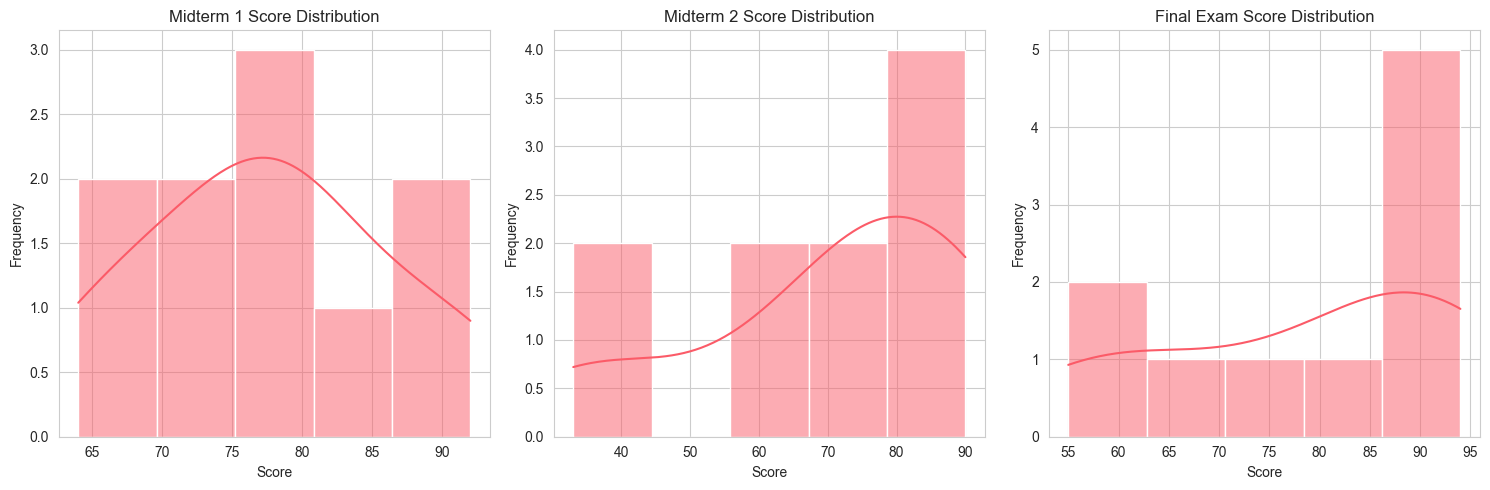

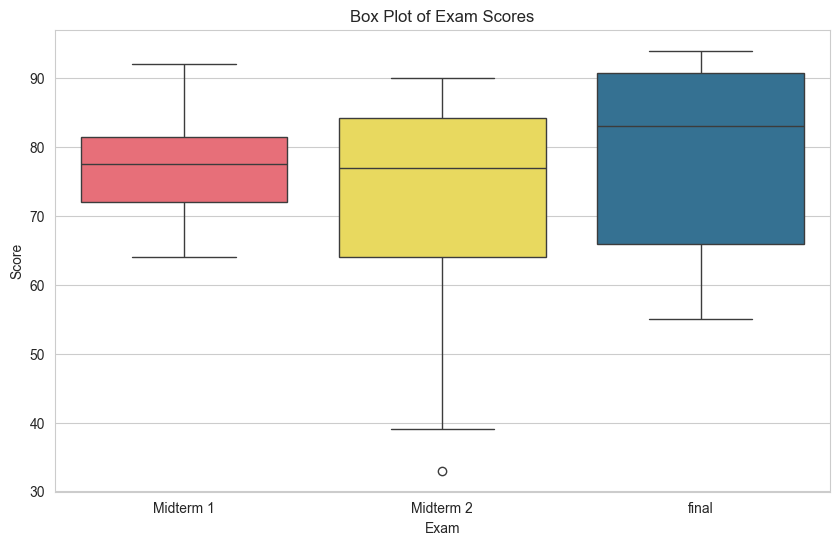

In [80]:
#Q 12 - Descriptive Statistics Of students grades in exams
exam_data = pd.read_excel(file_path)

exam_data['final'] = exam_data['final'] / 2

descriptive_stats = exam_data[['Midterm 1', 'Midterm 2', 'final']].describe()
descriptive_stats.loc['var'] = exam_data[['Midterm 1', 'Midterm 2', 'final']].var()
descriptive_stats.loc['range'] = descriptive_stats.loc['max'] - descriptive_stats.loc['min']

print(descriptive_stats)

colors = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(exam_data['Midterm 1'], kde=True)
plt.title('Midterm 1 Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(exam_data['Midterm 2'], kde=True)
plt.title('Midterm 2 Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(exam_data['final'], kde=True)
plt.title('Final Exam Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.boxplot(data=exam_data[['Midterm 1', 'Midterm 2', 'final']])
plt.title('Box Plot of Exam Scores')
plt.ylabel('Score')
plt.xlabel('Exam')

plt.show()


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/75523331.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




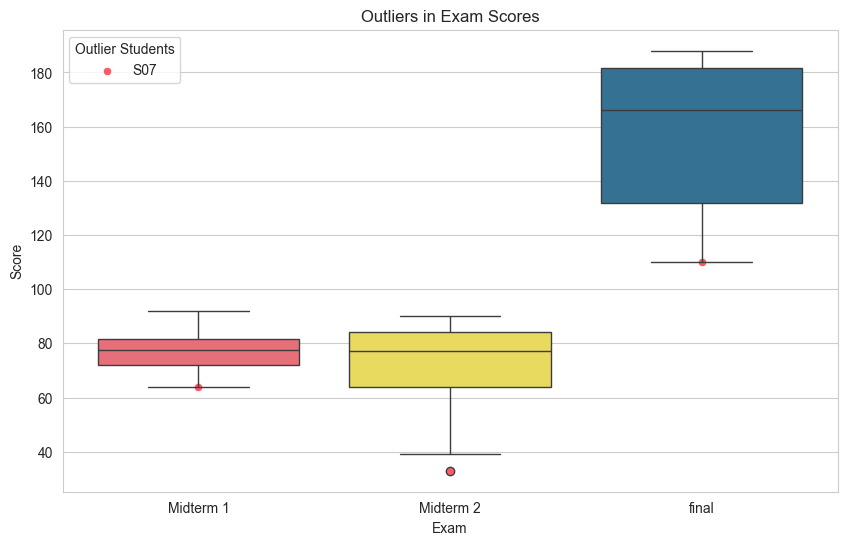

Outlier students: ['S07']


In [76]:
#Question 13 - Identify students whose score in any exam is an outlier (using statistical methods)
custom_palette = ['#FB5B68', '#FFEB48', '#2676A1']

sheets = pd.read_excel(file_path, sheet_name=None)

def detect_all_outliers(df, exam_names):
    outlier_students = set()
    for exam in exam_names:
        Q1 = df[exam].quantile(0.25)
        Q3 = df[exam].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[exam] < lower_bound) | (df[exam] > upper_bound)]['Student_id']
        outlier_students.update(outliers)
    return list(outlier_students)

exam_names = ['Midterm 1', 'Midterm 2', 'final']
grades_df = sheets['Grades']
outlier_students = detect_all_outliers(grades_df, exam_names)

grades_long_format = pd.melt(grades_df, id_vars=['Student_id'], value_vars=exam_names,
                             var_name='Exam', value_name='Score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='Score', data=grades_long_format, palette=custom_palette)

for student in outlier_students:
    student_data = grades_long_format[grades_long_format['Student_id'] == student]
    sns.scatterplot(x='Exam', y='Score', data=student_data, color=custom_palette[0], label=student, marker='o')

plt.title('Outliers in Exam Scores')
plt.legend(title='Outlier Students')
plt.show()

print(f"Outlier students: {outlier_students}")


In [77]:
#Question 14 - List students whose final score improved from their Midterm 1 score by at least 20%.
grades_df = pd.read_excel(file_path, sheet_name='Grades')

grades_df['final_adjusted'] = (grades_df['final'] / 200) * 100

grades_df['Improvement_percentage'] = ((grades_df['final_adjusted'] - grades_df['Midterm 1']) / grades_df['Midterm 1']) * 100

students_improved_20_adjusted = grades_df[grades_df['Improvement_percentage'] >= 20][['Student_id', 'Midterm 1', 'final_adjusted', 'Improvement_percentage']]

students_improved_20_adjusted


Student_id  Midterm 1  final_adjusted  Improvement_percentage
2        S03         77            94.0               22.077922
5        S06         71            87.5               23.239437

In [78]:
#Question 15 - Determine the percentage of students who improved their score from Midterm 1 to Midterm 2.
grades_df = pd.read_excel(file_path, sheet_name='Grades')

grades_df['Percentage_Increase'] = ((grades_df['Midterm 2'] - grades_df['Midterm 1']) / grades_df['Midterm 1']) * 100

students_with_increase = grades_df[grades_df['Percentage_Increase'] > 0][['Student_id', 'Midterm 1', 'Midterm 2', 'Percentage_Increase']]

students_with_increase


Student_id  Midterm 1  Midterm 2  Percentage_Increase
0        S01         78         82             5.128205
1        S02         82         85             3.658537
2        S03         77         90            16.883117
3        S04         75         77             2.666667
4        S05         67         77            14.925373

<h3 style="font-family: garamond; font-size: 25px; background-color: white; color: darkgreen; border-radius: 100px 100px; text-align: left">Descriptive Statistics of Student Grades</h3>

<ul style="list-style-type: circle; color: darkgreen; font-size: 17px;">
  <li>The average grade improved from Midterm 1 to the final exam, indicating potential improvement in understanding or performance over time.</li>
  <li>Midterm 2 shows the highest variability (standard deviation) among the three exams, suggesting a wider range of student performance in this exam.</li>
  <li>The median grades for all exams are fairly close to their respective averages, suggesting a relatively symmetrical distribution of grades.</li>
  <li>The maximum grades are consistently high across all exams, indicating the presence of high-performing students in each exam.</li>
  <li>The minimum grade for Midterm 2 is significantly lower than the other exams, which could indicate that this exam was particularly challenging or that certain students struggled more with the material covered in this exam.</li>
</ul>


<p style="color: darkgreen; font-size: 17px;">The histograms above show the distribution of scores for each exam:</p>

<ul style="list-style-type: circle; color: darkgreen; font-size: 17px;">
  <li>Midterm 1: The scores are relatively spread out but lean towards the higher end, indicating a general trend of good performance among students.</li>
  <li>Midterm 2: This histogram shows a wider spread in scores, with a significant dip in the middle range. It suggests a more varied performance among students compared to Midterm 1.</li>
  <li>Final Exam: The scores here are more evenly distributed across the range, with a slight skew towards higher scores.</li>
</ul>

<p style="color: darkgreen; font-size: 17px;">The box plots provide additional insights into the distribution of scores for each exam:</p>

<ul style="list-style-type: circle; color: darkgreen; font-size: 17px;">
  <li>Midterm 1: The box plot shows a relatively narrow interquartile range (IQR), indicating that most of the students scored within a close range of each other. There are no evident outliers.</li>
  <li>Midterm 2: This exam has a wider IQR, suggesting more variability in student performance. The presence of outliers (particularly on the lower end) indicates that some students struggled significantly with this exam.</li>
  <li>Final Exam: The IQR is broader than Midterm 1, suggesting more variation in scores. The distribution is fairly symmetrical, and there are no apparent outliers.</li>
</ul>


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="physiological-data-analysis"></a>2. Physiological Data Analysis
</h3>


<p style="color: #00008B; font-size: 20px">1. Examine the average heart rate (HR) changes from Midterm to Final exams.</p>

<p style="color: #00008B; font-size: 20px">2. What is the correlation between EDA levels and academic performance?</p>

<p style="color: #00008B; font-size: 20px">3. Analyze the trends in average temperature (Temp) readings during each type of exam.</p>

<p style="color: #00008B; font-size: 20px">4. Plot the distribution of IBI values for students during the final exam.</p>

<p style="color: #00008B; font-size: 20px">5. Identify any outliers in physiological data during exams and explore potential reasons.</p>

<p style="color: #00008B; font-size: 20px">6. Analyzing patterns and trends in students physiological data during Final Exams</p>

<p style="color: #00008B; font-size: 20px">7. Among the students, who demonstrates the greatest variation in electrodermal activity (EDA), and what is the extent of this variation? </p>

<p style="color: #00008B; font-size: 20px">8. Individual Performance Trends (Standardized Scores)</p>

<p style="color: #00008B; font-size: 20px">9. Student with Most Stable HR Physiological Responses during exams </p>


<p style="color: #00008B; font-size: 20px">10.Use Facet Grid to plot the distribution of Temp measurements for each exam type. </p>
  



In [17]:
#Q1 - Examine the average heart rate (HR) changes from Midterm to Final exams.
def standardize_student_id(df):
    if 'Student_id' in df.columns:
        df['Student_id'] = df['Student_id'].apply(lambda x: f"S{int(x[1:]):02d}" if pd.notna(x) and isinstance(x, str) else x)
    return df

xls = pd.ExcelFile(file_path)
grades_data = standardize_student_id(pd.read_excel(xls, 'Grades'))
hr_data = standardize_student_id(pd.read_excel(xls, 'HR')).dropna()

hr_avg = hr_data.groupby(['Student_id', 'Exam']).mean().reset_index()

def get_avg_hr(row, exam_type, hr_data):
    student_hr_data = hr_data[(hr_data['Student_id'] == row['Student_id']) & (hr_data['Exam'] == exam_type)]
    return student_hr_data['HR'].mean() if not student_hr_data.empty else None

hr_avg_with_exams = hr_avg.merge(grades_data, on='Student_id')
hr_avg_with_exams['Avg_HR_Midterm1'] = hr_avg_with_exams.apply(get_avg_hr, args=('Midterm 1', hr_avg), axis=1)
hr_avg_with_exams['Avg_HR_Midterm2'] = hr_avg_with_exams.apply(get_avg_hr, args=('Midterm 2', hr_avg), axis=1)
hr_avg_with_exams['Avg_HR_Final'] = hr_avg_with_exams.apply(get_avg_hr, args=('final', hr_avg), axis=1)

hr_comparison = hr_avg_with_exams[['Student_id', 'Avg_HR_Midterm1', 'Avg_HR_Midterm2', 'Avg_HR_Final']].drop_duplicates()
hr_comparison['HR_Change_Midterm1_to_Final'] = hr_comparison['Avg_HR_Final'] - hr_comparison['Avg_HR_Midterm1']
hr_comparison['HR_Change_Midterm2_to_Final'] = hr_comparison['Avg_HR_Final'] - hr_comparison['Avg_HR_Midterm2']

print("Heart Rate Changes from Midterms to Final Exam:")
print(hr_comparison.to_string(index=False))


Heart Rate Changes from Midterms to Final Exam:
Student_id  Avg_HR_Midterm1  Avg_HR_Midterm2  Avg_HR_Final  HR_Change_Midterm1_to_Final  HR_Change_Midterm2_to_Final
       S01       103.074382       110.940849    106.069237                     2.994855                    -4.871612
       S02       111.395774       106.640307    119.890282                     8.494508                    13.249975
       S03       105.680635        97.320165    104.509430                    -1.171205                     7.189266
       S04       110.393691        94.793126     92.653532                   -17.740159                    -2.139593
       S05       108.237695       113.366352     95.397185                   -12.840510                   -17.969167
       S06       106.884286       104.584475    103.945573                    -2.938714                    -0.638902
       S07       112.336762        98.938350    101.190040                   -11.146722                     2.251690
       S08      

<p style="color: #008000; font-size: 20px">Overall Insights from the Analysis</p>

<p style="color: #008000; font-size: 17px">The heart rate analysis reveals diverse physiological responses to academic stress among students:</p>
<ul>
  <li><p style="color: #008000; font-size: 17px">Some students exhibit increased heart rates from Midterms to Finals, potentially indicating heightened stress.</p></li>
  <li><p style="color: #008000; font-size: 17px">Others show a decrease, possibly due to better preparation or stress management.</p></li>
</ul>
<p style="color: #008000; font-size: 17px">This variability in these responses highlights individual differences in coping with exam pressures. However, without more contextual data, such as specific exam details or subjective stress measures, the underlying causes of these HR changes remain speculative.</p>
<p style="color: #008000; font-size: 17px">This suggests the need for further, more comprehensive analysis.</p>


Correlation between EDA levels and Academic Performance:
Midterm 1: 0.113
Midterm 2: 0.044
Final: -0.075


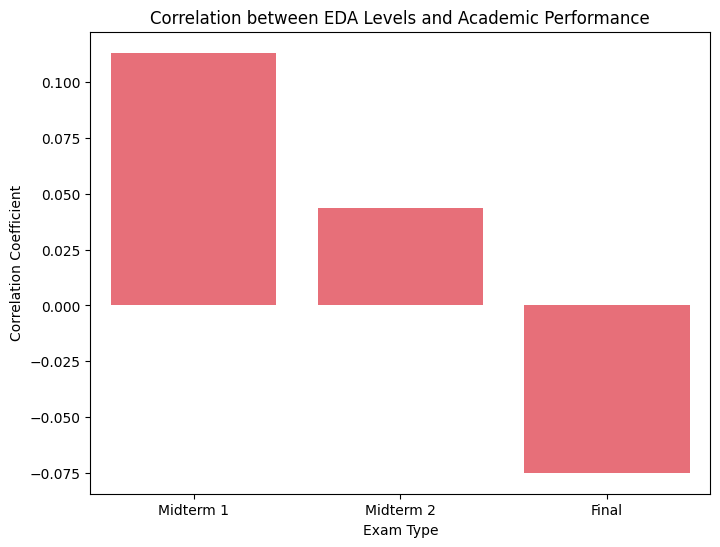

In [20]:
#Q2 - What is the correlation between EDA levels and academic performance?
def get_avg_eda(row, exam_type, eda_data):
    student_eda_data = eda_data[(eda_data['Student_id'] == row['Student_id']) & (eda_data['Exam'] == exam_type)]
    return student_eda_data['EDA'].mean() if not student_eda_data.empty else None

xls = pd.ExcelFile(file_path)

grades_data = standardize_student_id(pd.read_excel(xls, 'Grades'))
eda_data = standardize_student_id(pd.read_excel(xls, 'EDA'))
eda_data['Exam'] = eda_data['Exam'].str.lower()  # Ensure consistent labeling

eda_avg = eda_data.groupby(['Student_id', 'Exam']).mean().reset_index()

eda_avg_with_grades = eda_avg.merge(grades_data, on='Student_id')

eda_avg_with_grades['Avg_EDA_Midterm1'] = eda_avg_with_grades.apply(lambda row: get_avg_eda(row, 'midterm 1', eda_avg), axis=1)
eda_avg_with_grades['Avg_EDA_Midterm2'] = eda_avg_with_grades.apply(lambda row: get_avg_eda(row, 'midterm 2', eda_avg), axis=1)
eda_avg_with_grades['Avg_EDA_Final'] = eda_avg_with_grades.apply(lambda row: get_avg_eda(row, 'final', eda_avg), axis=1)

eda_grades_correlation_data = eda_avg_with_grades[['Avg_EDA_Midterm1', 'Avg_EDA_Midterm2', 'Avg_EDA_Final', 'Midterm 1', 'Midterm 2', 'final']]

correlations = {
    'Midterm 1': eda_grades_correlation_data['Avg_EDA_Midterm1'].corr(eda_grades_correlation_data['Midterm 1']),
    'Midterm 2': eda_grades_correlation_data['Avg_EDA_Midterm2'].corr(eda_grades_correlation_data['Midterm 2']),
    'Final': eda_grades_correlation_data['Avg_EDA_Final'].corr(eda_grades_correlation_data['final'])
}

print("Correlation between EDA levels and Academic Performance:")
for exam, corr in correlations.items():
    print(f"{exam}: {corr:.3f}")

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']
sns.set_palette(custom_palette)

plt.figure(figsize=(8, 6))
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()))
plt.title('Correlation between EDA Levels and Academic Performance')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Exam Type')
plt.show()


<p style="color: #008000; font-size: 17px" >The correlation between average EDA during Midterm 1 and Midterm 1 grades is approximately 0.113. This indicates a weak positive correlation, suggesting that slightly higher EDA levels might be associated with slightly higher grades in Midterm 1.</p>

<p style="color: #008000;font-size: 17px">The correlation between average EDA during Midterm 2 and Midterm 2 grades is approximately 0.044. This is a very weak positive correlation, suggesting a minimal relationship between EDA levels and Midterm 2 grades.</p>

<p style="color: #008000;font-size: 17px">The correlation between average EDA during the Final exam and Final grades is approximately -0.075. This indicates a weak negative correlation, suggesting that slightly higher EDA levels might be associated with slightly lower grades in the Final exam.</p>

<p style="color: #008000;font-size: 17px">These correlations are relatively weak, indicating that while there might be some relationship between EDA levels and academic performance, it is not strong.</p>


Average Temperature Readings During Exams:
  Student_id  Avg_TEMP_Midterm1  Avg_TEMP_Midterm2  Avg_TEMP_Final
0        S01          26.419231          27.139497       26.186864
1        S01          26.419231          27.139497       26.186864
2        S01          26.419231          27.139497       26.186864
3        S02          28.709734          27.877407       28.184801
4        S02          28.709734          27.877407       28.184801


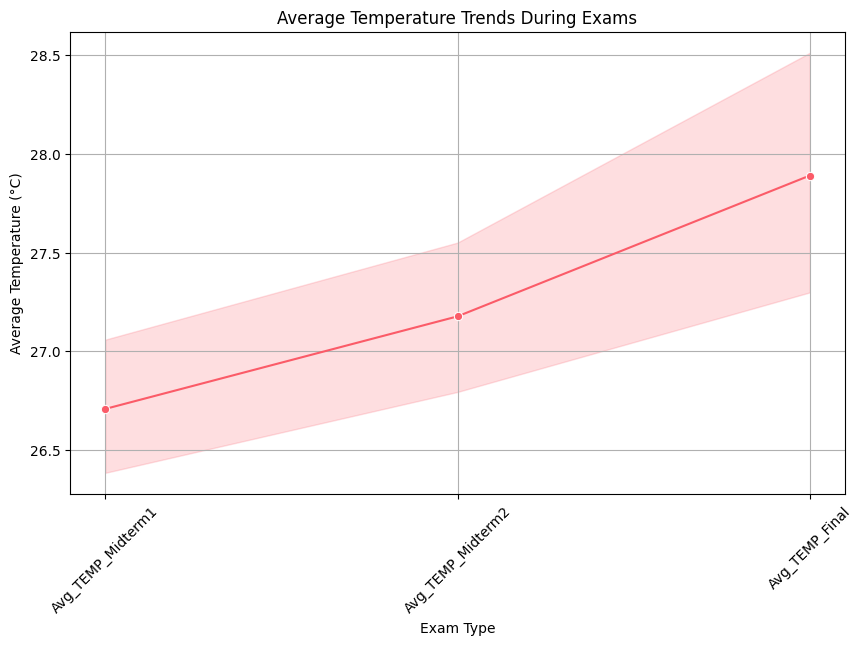

In [22]:
#Q3 - Analyze the trends in average temperature (Temp) readings during each type of exam

temp_data = standardize_student_id(pd.read_excel(xls, 'Temp'))

temp_avg = temp_data.groupby(['Student_id', 'Exam']).mean().reset_index()

grades_data = standardize_student_id(pd.read_excel(xls, 'Grades'))
temp_avg_with_exams = temp_avg.merge(grades_data, on='Student_id')

def get_avg_temp(row, exam_type, temp_data):
    student_temp_data = temp_data[(temp_data['Student_id'] == row['Student_id']) & (temp_data['Exam'].str.lower() == exam_type.lower())]
    return student_temp_data['TEMP'].mean() if not student_temp_data.empty else None

temp_avg_with_exams['Avg_TEMP_Midterm1'] = temp_avg_with_exams.apply(lambda row: get_avg_temp(row, 'Midterm 1', temp_avg), axis=1)
temp_avg_with_exams['Avg_TEMP_Midterm2'] = temp_avg_with_exams.apply(lambda row: get_avg_temp(row, 'Midterm 2', temp_avg), axis=1)
temp_avg_with_exams['Avg_TEMP_Final'] = temp_avg_with_exams.apply(lambda row: get_avg_temp(row, 'final', temp_avg), axis=1)

temp_trends_data = temp_avg_with_exams[['Student_id', 'Avg_TEMP_Midterm1', 'Avg_TEMP_Midterm2', 'Avg_TEMP_Final']]

print("Average Temperature Readings During Exams:")
print(temp_trends_data.head())  # Prints the first few rows of the data

temp_trends_melted = temp_trends_data.melt(id_vars=['Student_id'], var_name='Exam', value_name='Avg_Temp')

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']
sns.set_palette(custom_palette)

plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_trends_melted, x='Exam', y='Avg_Temp', marker='o')
plt.title('Average Temperature Trends During Exams')
plt.xlabel('Exam Type')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


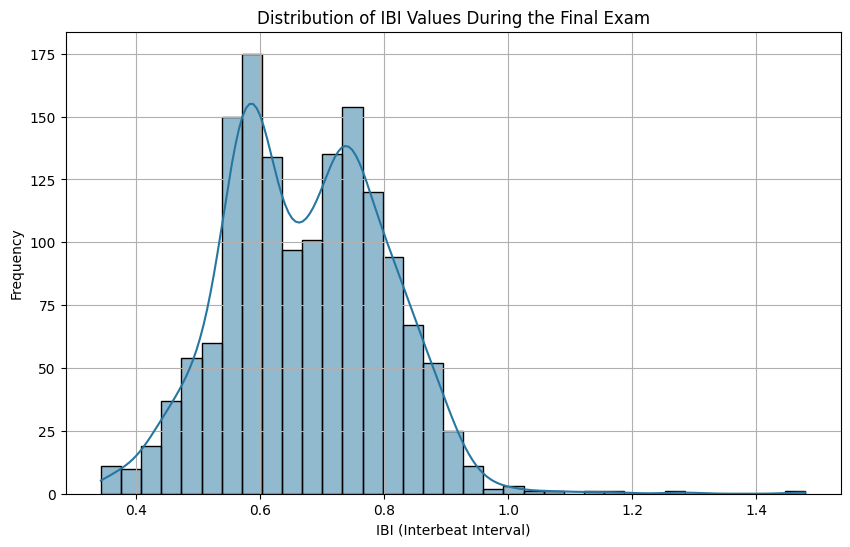

In [25]:
#Q4 - Plot the distribution of IBI values for students during the final exam.
ibi_data = standardize_student_id(pd.read_excel(xls, 'IBI'))

ibi_final_exam = ibi_data[ibi_data['Exam'].str.lower() == 'final']

# Custom color palette
custom_palette = ['#2676A1', '#FFBDB0']  # Your custom colors

plt.figure(figsize=(10, 6))
sns.histplot(ibi_final_exam['IBI'], kde=True, color=custom_palette[0])
plt.title('Distribution of IBI Values During the Final Exam')
plt.xlabel('IBI (Interbeat Interval)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3300867556.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




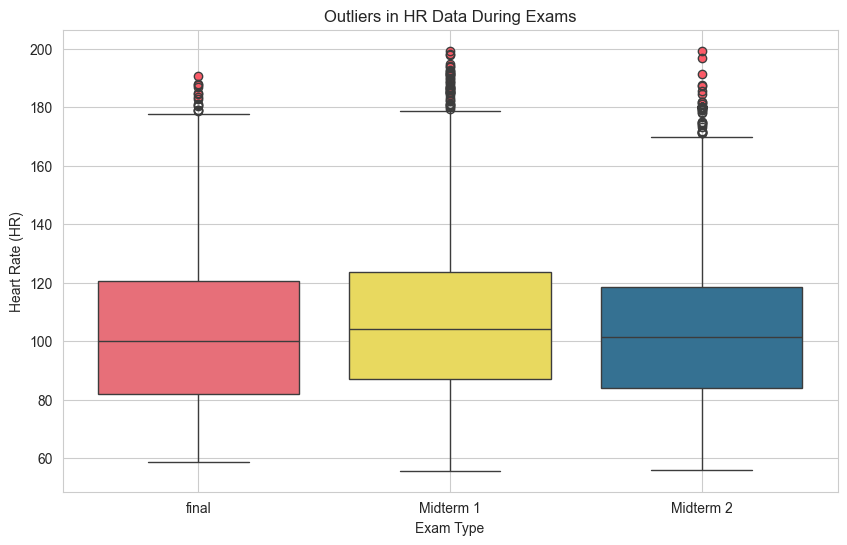

/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3300867556.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




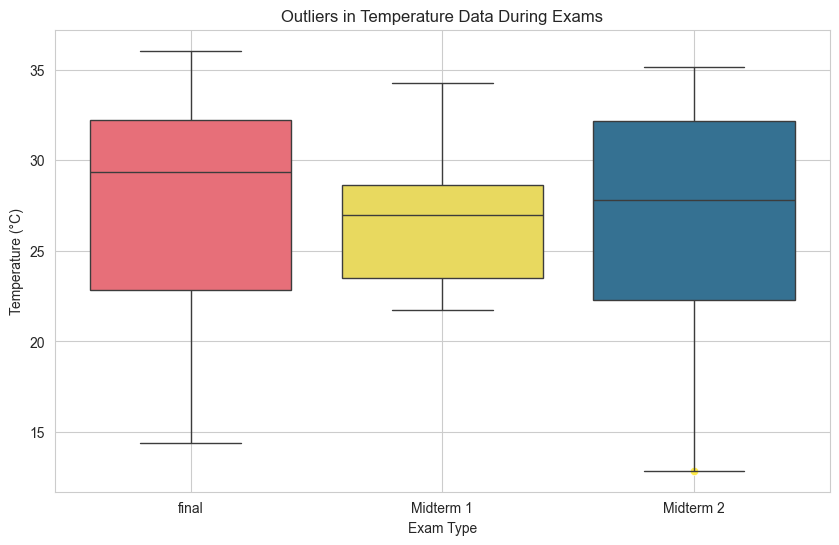

/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3300867556.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




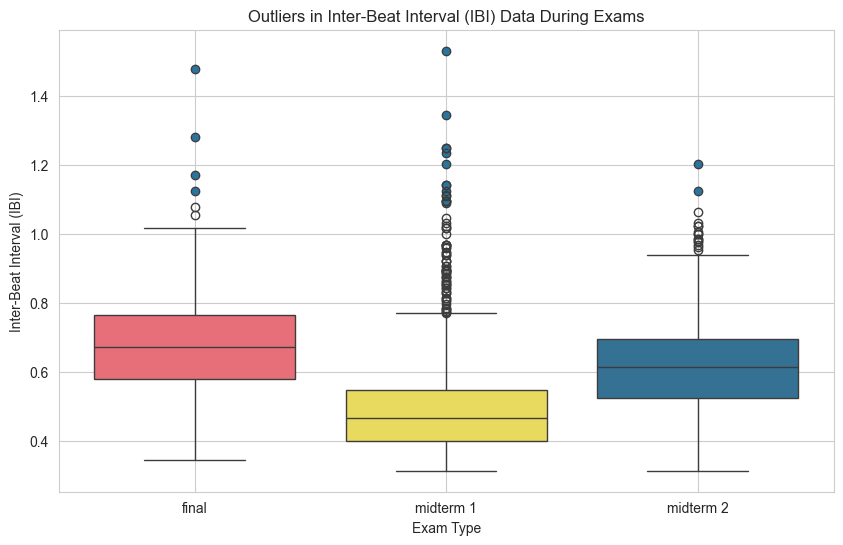

/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3300867556.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




IndexError: list index out of range

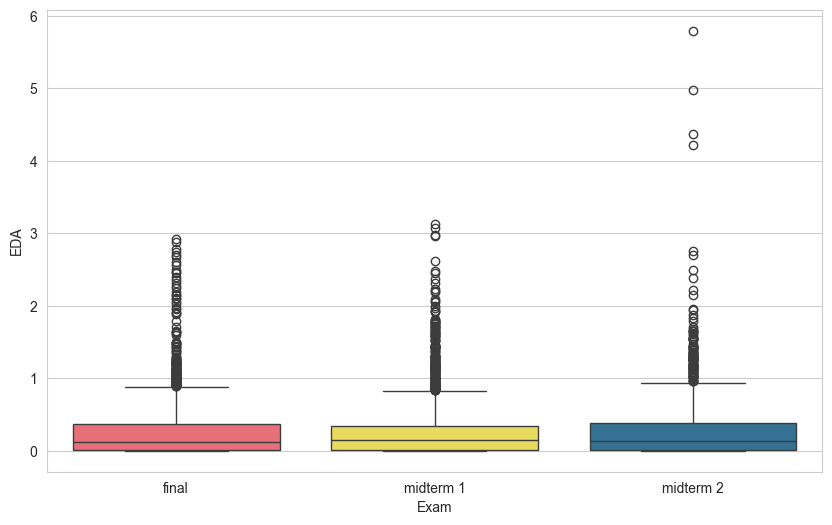

In [79]:
#Q5 - Identify any outliers in physiological data during exams and explore potential reasons.</p>

hr_data = pd.read_excel(xls, 'HR')

hr_data['HR_zscore'] = (hr_data['HR'] - hr_data['HR'].mean()) / hr_data['HR'].std()

outliers_hr = hr_data[(hr_data['HR_zscore'] > 3) | (hr_data['HR_zscore'] < -3)]

temp_data = pd.read_excel(xls, 'Temp')

temp_data['TEMP_zscore'] = (temp_data['TEMP'] - temp_data['TEMP'].mean()) / temp_data['TEMP'].std()

outliers_temp = temp_data[(temp_data['TEMP_zscore'] > 3) | (temp_data['TEMP_zscore'] < -3)]

ibi_data = pd.read_excel(xls, 'IBI')
ibi_data['IBI_zscore'] = (ibi_data['IBI'] - ibi_data['IBI'].mean()) / ibi_data['IBI'].std()

outliers_ibi = ibi_data[(ibi_data['IBI_zscore'] > 3) | (ibi_data['IBI_zscore'] < -3)]

eda_data = pd.read_excel(xls, 'EDA')
eda_data['EDA_zscore'] = (eda_data['EDA'] - eda_data['EDA'].mean()) / eda_data['EDA'].std()

outliers_eda = eda_data[(eda_data['EDA_zscore'] > 3) | (eda_data['EDA_zscore'] < -3)]

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1']  # Your custom colors

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='HR', data=hr_data, palette=custom_palette)
sns.scatterplot(x='Exam', y='HR', data=outliers_hr, color=custom_palette[0])
plt.title('Outliers in HR Data During Exams')
plt.xlabel('Exam Type')
plt.ylabel('Heart Rate (HR)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='TEMP', data=temp_data, palette=custom_palette)
sns.scatterplot(x='Exam', y='TEMP', data=outliers_temp, color=custom_palette[1])
plt.title('Outliers in Temperature Data During Exams')
plt.xlabel('Exam Type')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='IBI', data=ibi_data, palette=custom_palette)
sns.scatterplot(x='Exam', y='IBI', data=outliers_ibi, color=custom_palette[2])
plt.title('Outliers in Inter-Beat Interval (IBI) Data During Exams')
plt.xlabel('Exam Type')
plt.ylabel('Inter-Beat Interval (IBI)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='EDA', data=eda_data, palette=custom_palette)
sns.scatterplot(x='Exam', y='EDA', data=outliers_eda, color=custom_palette[3])
plt.title('Outliers in Electrodermal Activity (EDA) Data During Exams')
plt.xlabel('Exam Type')
plt.ylabel('Electrodermal Activity (EDA)')
plt.grid(True)
plt.show()

print("Identified Outliers in HR Data:")
print(outliers_hr)
print("\nIdentified Outliers in Temperature Data:")
print(outliers_temp)
print("\nIdentified Outliers in IBI Data:")
print(outliers_ibi)
print("\nIdentified Outliers in EDA Data:")
print(outliers_eda)


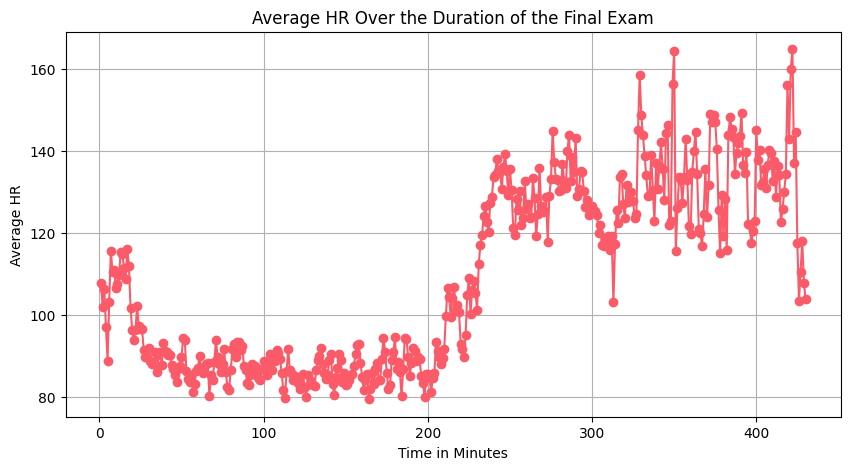

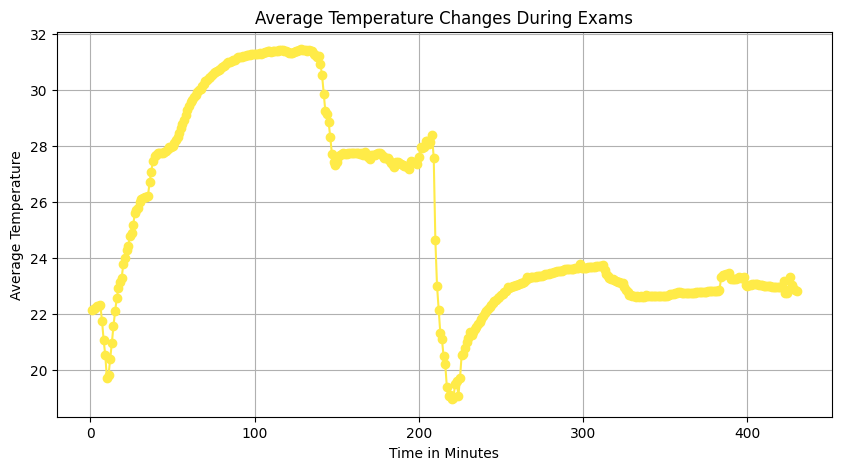

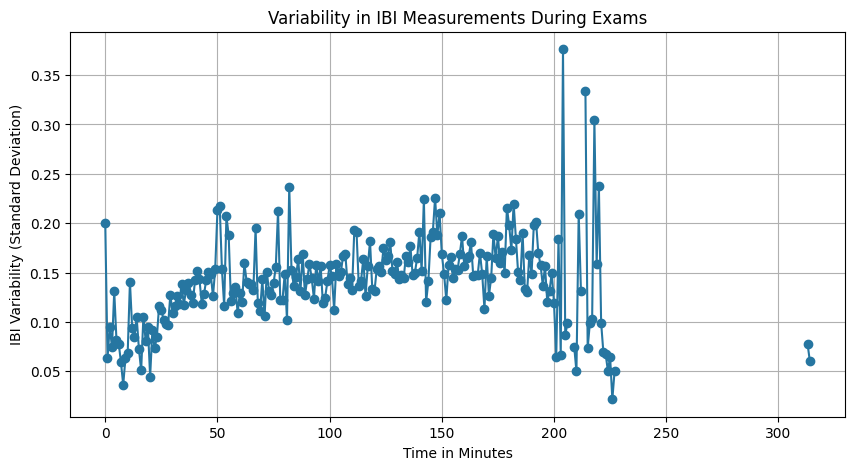

In [28]:
#Q6 - Analyzing patterns and trends in students physiological data during Final Exams
hr_data = pd.read_excel(file_path, sheet_name='HR')
eda_data = pd.read_excel(file_path, sheet_name='EDA')
temp_data = pd.read_excel(file_path, sheet_name='Temp')
ibi_data = pd.read_excel(file_path, sheet_name='IBI')

def drop_nulls(df, cols):
    return df.dropna(subset=cols)

hr_data = standardize_student_ids(hr_data)
eda_data = standardize_student_ids(eda_data)
temp_data = standardize_student_ids(temp_data)
ibi_data = standardize_student_ids(ibi_data)

hr_data = drop_nulls(hr_data, ['HR'])
eda_data = drop_nulls(eda_data, ['EDA'])
temp_data = drop_nulls(temp_data, ['TEMP'])
ibi_data = drop_nulls(ibi_data, ['IBI'])

# Analysis 1: Average HR over the Duration of the Final Exam
final_hr_data = hr_data[hr_data['Exam'] == 'final']
avg_hr_final = final_hr_data.groupby('Time in mins')['HR'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_hr_final.index, avg_hr_final.values, marker='o', color='#FB5B68')  # Red color
plt.title('Average HR Over the Duration of the Final Exam')
plt.xlabel('Time in Minutes')
plt.ylabel('Average HR')
plt.grid(True)
plt.show()

# Analysis 2: Interactive EDA Fluctuation Visualization
def plot_eda_fluctuation(exam_type):
    selected_eda_data = eda_data[eda_data['Exam'] == exam_type]
    avg_eda = selected_eda_data.groupby('Time in mins')['EDA'].mean()

    fig = px.line(avg_eda, x=avg_eda.index, y=avg_eda.values, title=f'EDA Fluctuation During {exam_type} Exam')
    fig.update_xaxes(title_text='Time in Minutes')
    fig.update_yaxes(title_text='Average EDA')
    fig.show()

avg_temp = temp_data.groupby('Time in mins')['TEMP'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_temp.index, avg_temp.values, marker='o', color='#FFEB48')  # Yellow color
plt.title('Average Temperature Changes During Exams')
plt.xlabel('Time in Minutes')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

# Analysis 3 : IBI Variabilty over the duration of final exam

ibi_variability = ibi_data.groupby('Time in mins')['IBI'].std()

plt.figure(figsize=(10, 5))
plt.plot(ibi_variability.index, ibi_variability.values, marker='o', color='#2676A1')  # Blue color
plt.title('Variability in IBI Measurements During Exams')
plt.xlabel('Time in Minutes')
plt.ylabel('IBI Variability (Standard Deviation)')
plt.grid(True)
plt.show()


 


Student with the highest average HR: S002, Average HR: 114.31
Student with the greatest variation in EDA: S004, Variation: 0.69


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/932550448.py:42: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[91.  90.  94.  74.5 78.5 87.5 55.  92.  63.  58. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



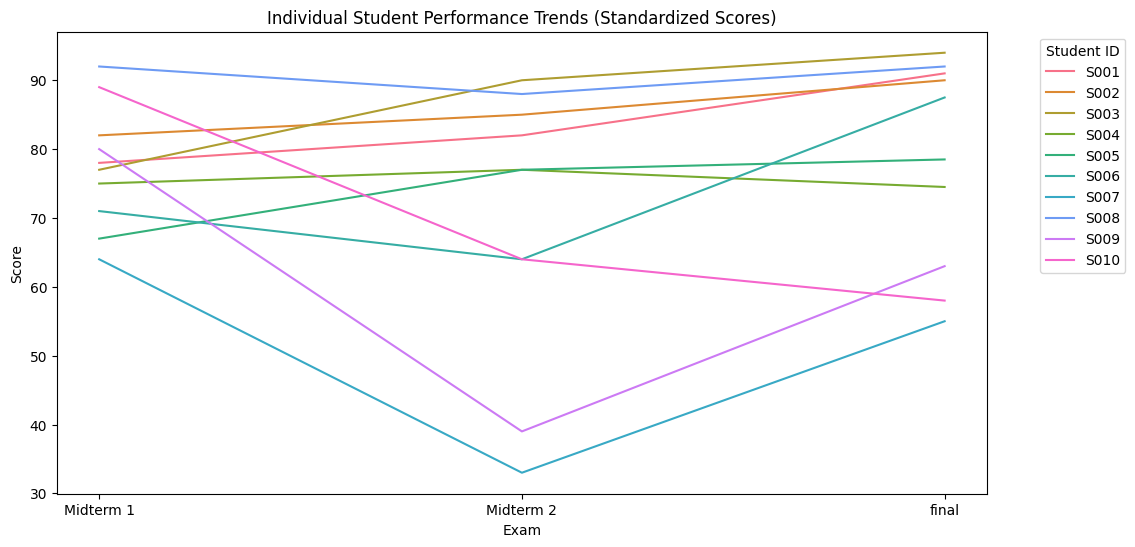

Student with the most stable HR: S001, HR Stability: 21.17


In [41]:
#Q7 - Among the students, who demonstrates the greatest variation in electrodermal activity (EDA), and what is the extent of this variation?hr_data = pd.read_excel(file_path, sheet_name='HR')
eda_data = pd.read_excel(file_path, sheet_name='EDA')
temp_data = pd.read_excel(file_path, sheet_name='Temp')
ibi_data = pd.read_excel(file_path, sheet_name='IBI')
grades_data = pd.read_excel(file_path, sheet_name='Grades')

def standardize_student_ids(df):
    df['Student_id'] = df['Student_id'].astype(str).apply(lambda x: 'S0' + x[-2:] if len(x) == 3 or len(x) == 2 else x)
    return df

def drop_nulls(df, cols):
    return df.dropna(subset=cols)

hr_data = standardize_student_ids(hr_data)
eda_data = standardize_student_ids(eda_data)
temp_data = standardize_student_ids(temp_data)
ibi_data = standardize_student_ids(ibi_data)
grades_data = standardize_student_ids(grades_data)

hr_data = drop_nulls(hr_data, ['HR'])
eda_data = drop_nulls(eda_data, ['EDA'])
temp_data = drop_nulls(temp_data, ['TEMP'])
ibi_data = drop_nulls(ibi_data, ['IBI'])
grades_data = drop_nulls(grades_data, ['Midterm 1', 'Midterm 2', 'final'])

# Analysis 1: Highest Average HR During Exams
avg_hr_per_student = hr_data.groupby('Student_id')['HR'].mean()
max_hr_student = avg_hr_per_student.idxmax()
max_hr_value = avg_hr_per_student.max()

print(f"Student with the highest average HR: {max_hr_student}, Average HR: {max_hr_value:.2f}")

# Analysis 2: Greatest Variation in EDA Levels
eda_variation_per_student = eda_data.groupby('Student_id')['EDA'].std()
max_variation_student = eda_variation_per_student.idxmax()
max_variation_value = eda_variation_per_student.max()

print(f"Student with the greatest variation in EDA: {max_variation_student}, Variation: {max_variation_value:.2f}")

# Transforming grades data into long-form and standardizing the final exam scores
grades_long_form = grades_data.melt(id_vars='Student_id', var_name='Exam', value_name='Score')
grades_long_form.loc[grades_long_form['Exam'] == 'final', 'Score'] /= 2

# Q8 Individual Performance Trends (Standardized Scores)
plt.figure(figsize=(12, 6))
sns.lineplot(data=grades_long_form, x='Exam', y='Score', hue='Student_id')
plt.title('Individual Student Performance Trends (Standardized Scores)')
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Q9- Student with Most Stable Physiological Responses
hr_stability_per_student = hr_data.groupby('Student_id')['HR'].std().sort_values()
most_stable_student = hr_stability_per_student.idxmin()
min_variation = hr_stability_per_student.min()

print(f"Student with the most stable HR: {most_stable_student}, HR Stability: {min_variation:.2f}")


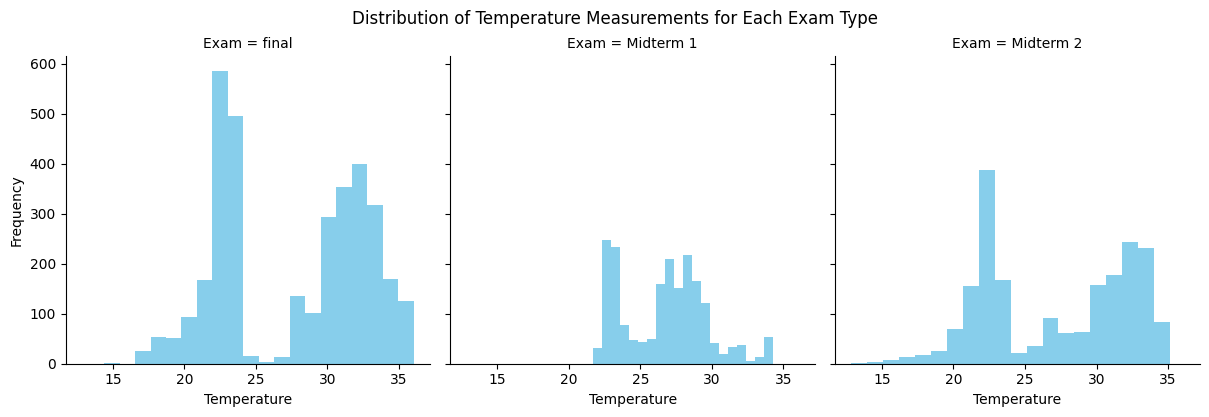

In [55]:
#Q10 - Use Facet Grid to plot the distribution of Temp measurements for each exam type.
temp_df = pd.read_excel(file_path, sheet_name='Temp')

# Creating a FacetGrid
g = sns.FacetGrid(temp_df, col="Exam", col_wrap=3, height=4, aspect=1)

g.map(plt.hist, "TEMP", bins=20, color='skyblue')

g.fig.suptitle('Distribution of Temperature Measurements for Each Exam Type', y=1.03)
g.set_axis_labels('Temperature', 'Frequency')

plt.show()


<p style="font-size: 17px; color: darkgreen;"><strong>Highest Average HR During Exams:</strong></p>
<p style="font-size: 17px; color: darkgreen;">The student with the highest average heart rate (HR) during exams is identified as S002 with an average HR of 114.31.</p>
<p style="font-size: 17px; color: darkgreen;"><strong>Insight:</strong> This could indicate that S002 experiences higher levels of stress or anxiety during exams, as a higher average heart rate is often associated with increased stress levels.</p>

<p style="font-size: 17px; color: darkgreen;"><strong>Greatest Variation in EDA Levels:</strong></p>
<p style="font-size: 17px; color: darkgreen;">The student with the greatest variation in electrodermal activity (EDA) is S004, with a variation value of 0.69.</p>
<p style="font-size: 17px; color: darkgreen;"><strong>Insight:</strong> This suggests that S004 has the most fluctuating stress levels during exams. High variability in EDA can be indicative of changing emotional states or stress responses.</p>


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="demographics-data-analysis"></a>Demographics Data Analysis
</h3>


<p style="color: #00008B; font-size: 20px">1. Categorize students by gender and compare their average exam scores.</p>

<p style="color: #00008B; font-size: 20px">2. Investigate the gender ratio within each race category.</p>

<p style="color: #00008B; font-size: 20px">3. Determine if theres a correlation between students' DOB month and their academic performance.</p>

<p style="color: #00008B; font-size: 20px">4. Visualize the demographic diversity of the student population.</p>

<p style="color: #00008B; font-size: 20px">5. Comparison of academic performance between different races.</p>

<p style="color: #00008B; font-size: 20px">6. Age distribution among students and its correlation with academic performance.</p>

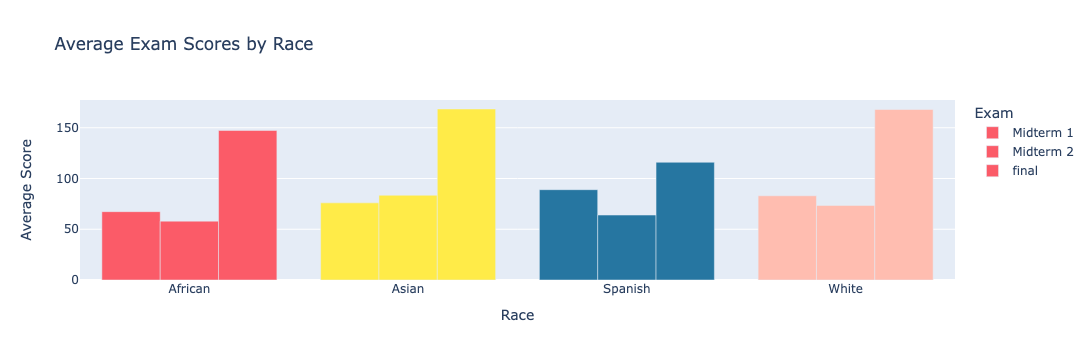

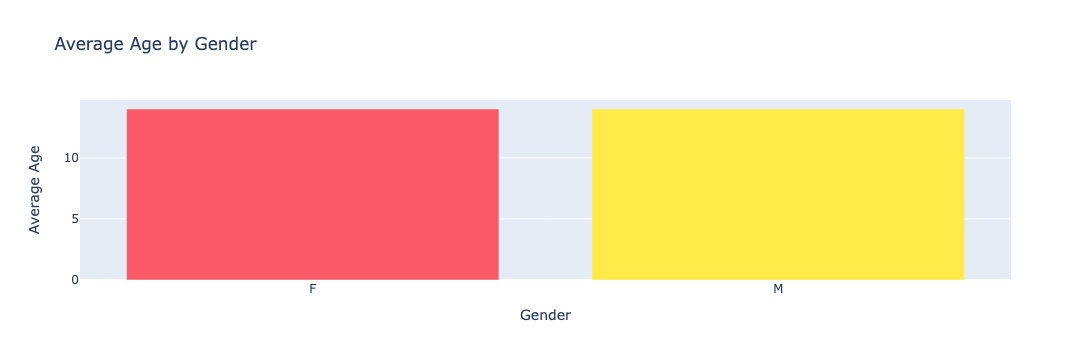

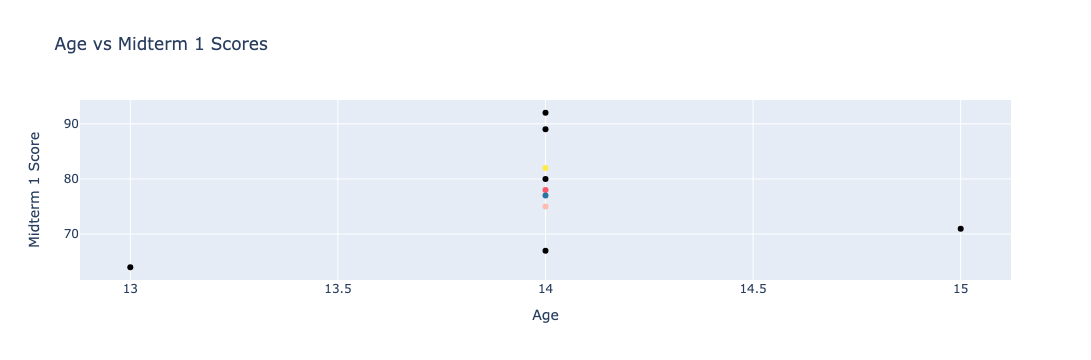

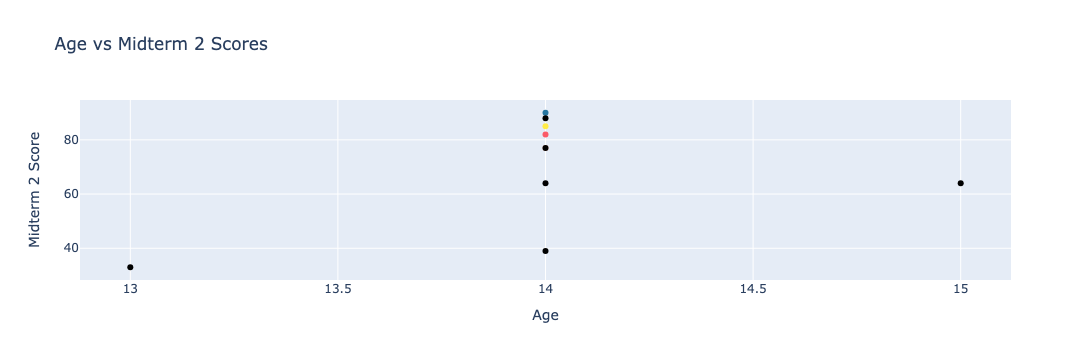

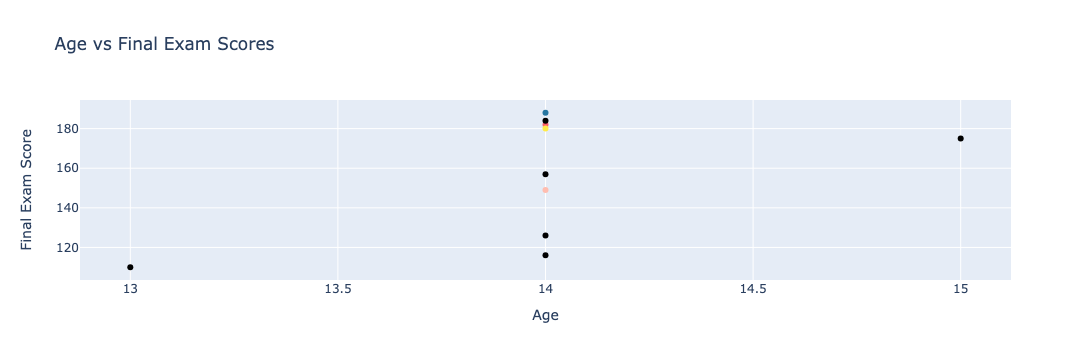

In [30]:
#Q1- Categorize students by gender and compare their average exam scores
demography_data = pd.read_excel(file_path, sheet_name='Demography')
grades_data = pd.read_excel(file_path, sheet_name='Grades')

merged_data = pd.merge(demography_data, grades_data, on='Student_id')

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']

#Q2 - Investigate the gender ratio within each race category.
# Analysis 1: How do exam scores vary across different races?
race_avg_scores = merged_data.groupby('Race')[['Midterm 1', 'Midterm 2', 'final']].mean().reset_index()
race_avg_scores_plot = px.bar(
    race_avg_scores, 
    x='Race', 
    y=['Midterm 1', 'Midterm 2', 'final'], 
    barmode='group',
    title='Average Exam Scores by Race',
    labels={'value': 'Average Score', 'variable': 'Exam'}
)
race_avg_scores_plot.update_traces(marker_color=custom_palette)
race_avg_scores_plot.show()

# Analysis 2: Is there a significant age difference among students of different genders?
current_year = datetime.now().year
merged_data['Age'] = current_year - merged_data['DOB'].dt.year
gender_avg_age = merged_data.groupby('Gender')['Age'].mean().reset_index()
gender_avg_age_plot = px.bar(
    gender_avg_age, 
    x='Gender', 
    y='Age', 
    title='Average Age by Gender',
    labels={'Age': 'Average Age'}
)
gender_avg_age_plot.update_traces(marker_color=custom_palette)
gender_avg_age_plot.show()

#Q3- How does academic performance correlate with student's age?
scatter_plot_midterm1 = px.scatter(
    merged_data, 
    x='Age', 
    y='Midterm 1', 
    title='Age vs Midterm 1 Scores',
    labels={'Age': 'Age', 'Midterm 1': 'Midterm 1 Score'}
)
scatter_plot_midterm2 = px.scatter(
    merged_data, 
    x='Age', 
    y='Midterm 2', 
    title='Age vs Midterm 2 Scores',
    labels={'Age': 'Age', 'Midterm 2': 'Midterm 2 Score'}
)
scatter_plot_final = px.scatter(
    merged_data, 
    x='Age', 
    y='final', 
    title='Age vs Final Exam Scores',
    labels={'Age': 'Age', 'final': 'Final Exam Score'}
)
scatter_plot_midterm1.update_traces(marker_color=custom_palette)
scatter_plot_midterm2.update_traces(marker_color=custom_palette)
scatter_plot_final.update_traces(marker_color=custom_palette)
scatter_plot_midterm1.show()
scatter_plot_midterm2.show()
scatter_plot_final.show()


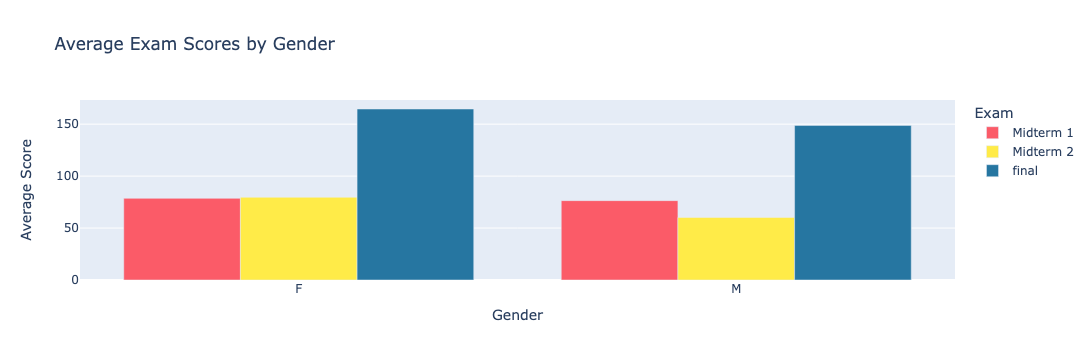

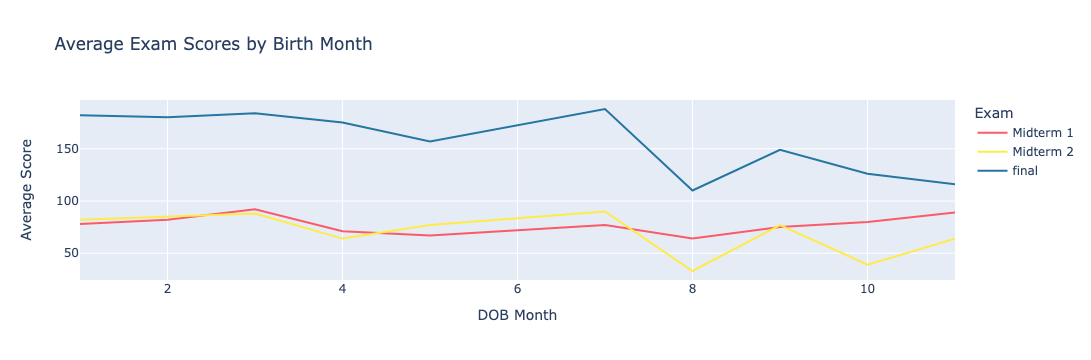

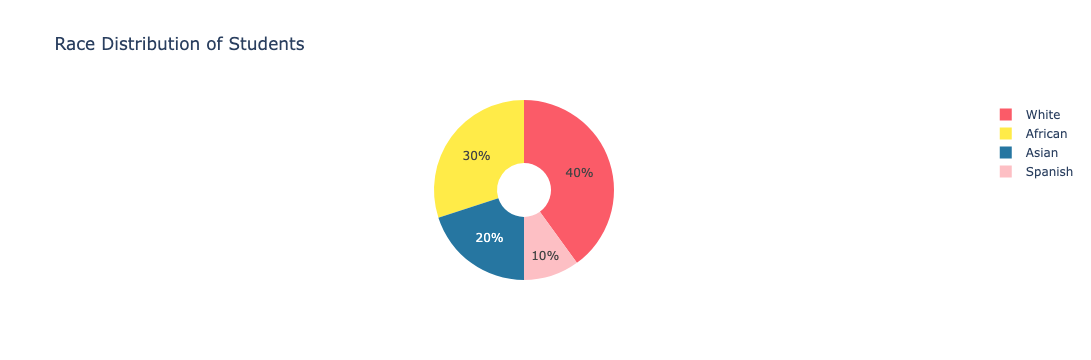

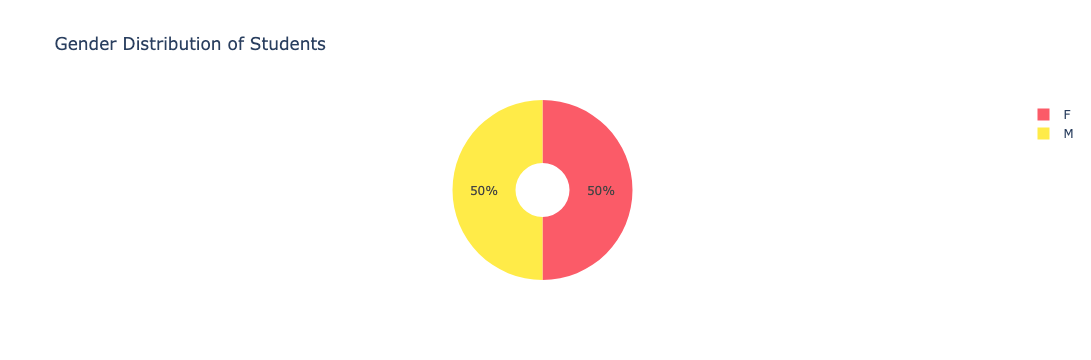

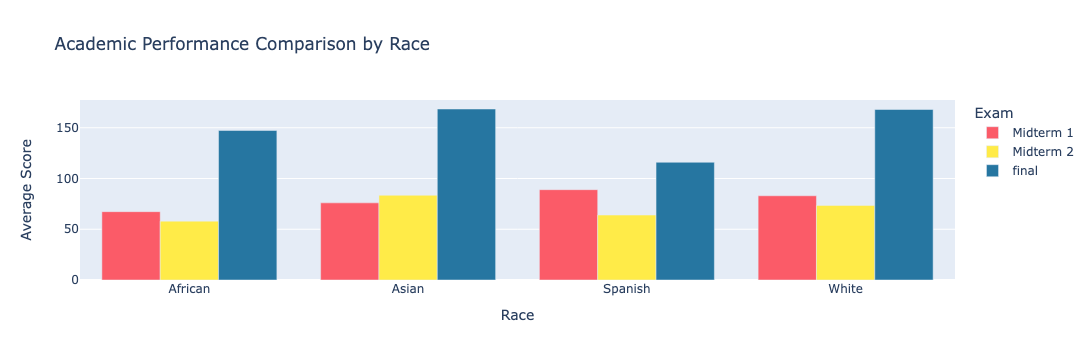

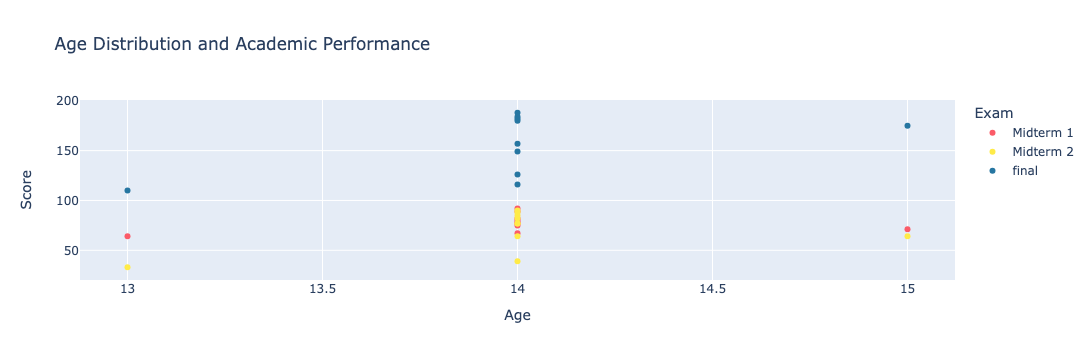

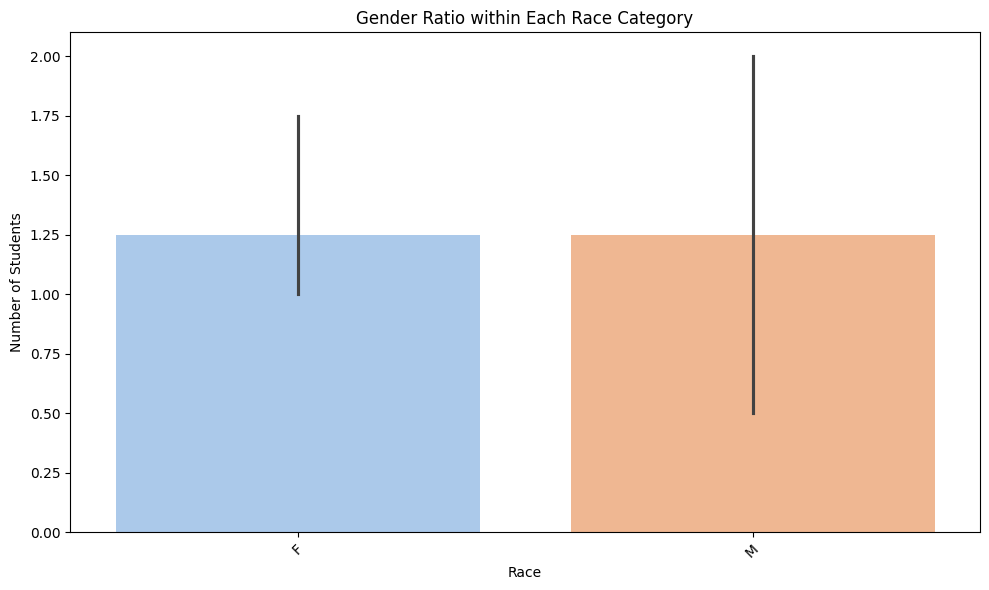

In [32]:
# Q4 Demographic Diversity Of Students
demography_data = pd.read_excel(file_path, sheet_name='Demography')
grades_data = pd.read_excel(file_path, sheet_name='Grades')

merged_data = pd.merge(demography_data, grades_data, on='Student_id')

import plotly.express as px

# Define a custom color palette
custom_palette = ['#FB5B68', '#FFEB48', '#2676A1']

gender_avg_scores = merged_data.groupby('Gender')[['Midterm 1', 'Midterm 2', 'final']].mean().reset_index()

gender_avg_scores_plot = px.bar(
    gender_avg_scores, 
    x='Gender', 
    y=['Midterm 1', 'Midterm 2', 'final'], 
    barmode='group',
    title='Average Exam Scores by Gender',
    labels={'value': 'Average Score', 'variable': 'Exam'},
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
gender_avg_scores_plot.show()

gender_ratio = merged_data.groupby(['Race', 'Gender']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))

sns.set_palette(custom_palette)

sns.barplot(data=gender_ratio, palette='pastel')
plt.title('Gender Ratio within Each Race Category')
plt.ylabel('Number of Students')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.tight_layout()

merged_data['DOB Month'] = merged_data['DOB'].dt.month

month_avg_scores = merged_data.groupby('DOB Month')[['Midterm 1', 'Midterm 2', 'final']].mean().reset_index()

month_avg_scores_plot = px.line(
    month_avg_scores, 
    x='DOB Month', 
    y=['Midterm 1', 'Midterm 2', 'final'], 
    title='Average Exam Scores by Birth Month',
    labels={'value': 'Average Score', 'variable': 'Exam'},
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
month_avg_scores_plot.show()

#Analysis 5 Comparision of academic performance between different races

race_distribution_plot = px.pie(
    merged_data, 
    names='Race', 
    title='Race Distribution of Students',
    hole=0.3,
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
race_distribution_plot.show()

gender_distribution_plot = px.pie(
    merged_data, 
    names='Gender', 
    title='Gender Distribution of Students',
    hole=0.3,
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
gender_distribution_plot.show()

race_performance = merged_data.groupby('Race')[['Midterm 1', 'Midterm 2', 'final']].mean().reset_index()
race_performance_plot = px.bar(
    race_performance, 
    x='Race', 
    y=['Midterm 1', 'Midterm 2', 'final'], 
    barmode='group',
    title='Academic Performance Comparison by Race',
    labels={'value': 'Average Score', 'variable': 'Exam'},
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
race_performance_plot.show()

#Q6 Age distribution among students and its relation to performance in exams 

from datetime import datetime

current_year = datetime.now().year
merged_data['Age'] = current_year - merged_data['DOB'].dt.year

age_performance_plot = px.scatter(
    merged_data, 
    x='Age', 
    y=['Midterm 1', 'Midterm 2', 'final'], 
    title='Age Distribution and Academic Performance',
    labels={'Age': 'Age', 'value': 'Score', 'variable': 'Exam'},
    color_discrete_sequence=custom_palette  # Apply custom color palette
)
age_performance_plot.show()


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="exploring-plotly-library"></a>Exploring Plotly library and Visualizations
</h3>


<p style="color: #00008B; font-size: 20px">1. Trend Analysis of average scores.</p>
<p style="color: #00008B; font-size: 20px">2. Score distribution comparision.</p>
<p style="color: #00008B; font-size: 20px">3. Performance Improvement Analysis.</p>
<p style="color: #00008B; font-size: 20px">4. Correlation between exam scores.</p>
<p style="color: #00008B; font-size: 20px">5. Cumulative scores and ranking. </p>
<p style="color: #00008B; font-size: 20px">6. Score frequency analysis</p>

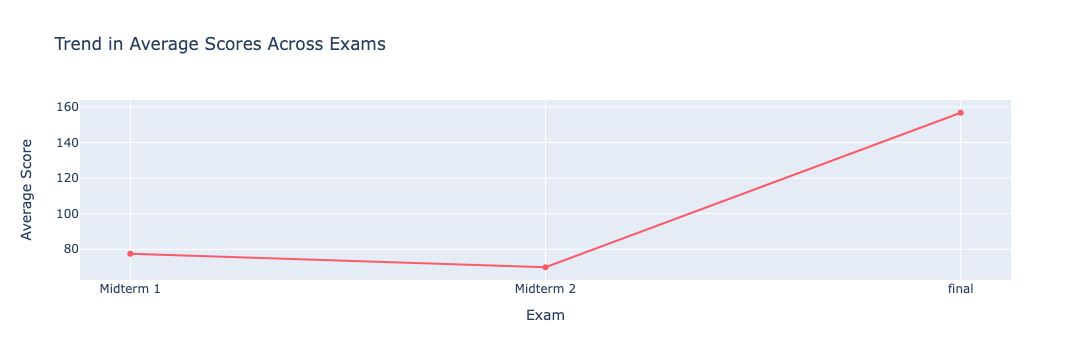

Insight 1: Observe the trend in average scores. An upward trend suggests improving performance, while a downward trend might indicate a need for additional support or review of teaching strategies.


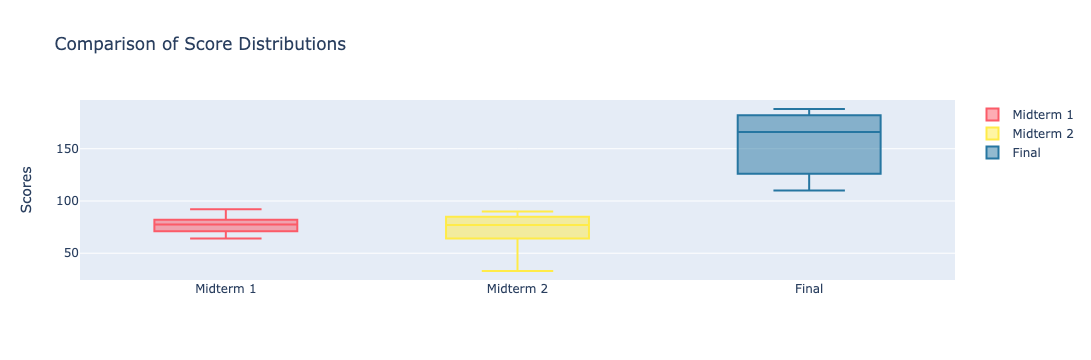

Insight 2: Examine the box plot for each exam's score distribution. Look for the median, spread, and outliers. Variations might indicate different levels of difficulty or student preparedness.


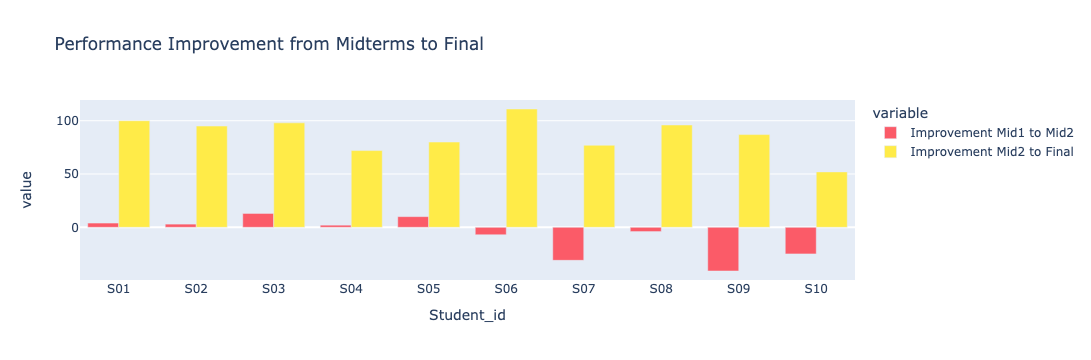

Insight 3: The bar chart displays each student's performance change over time. It's useful for identifying who needs more support and who is improving.


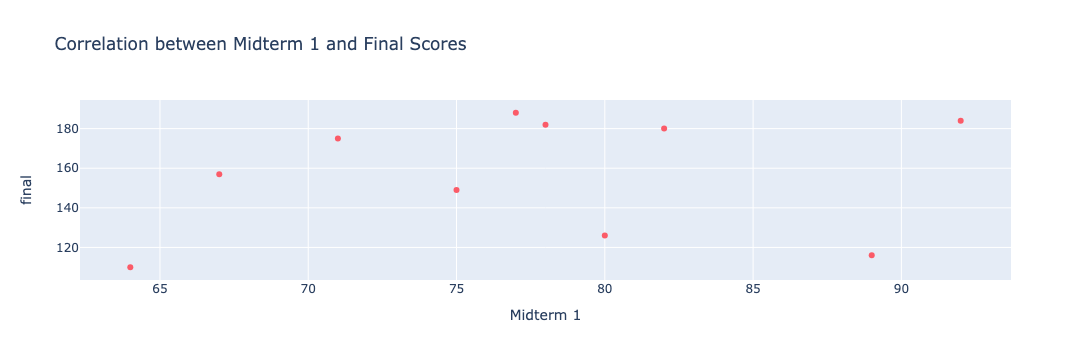

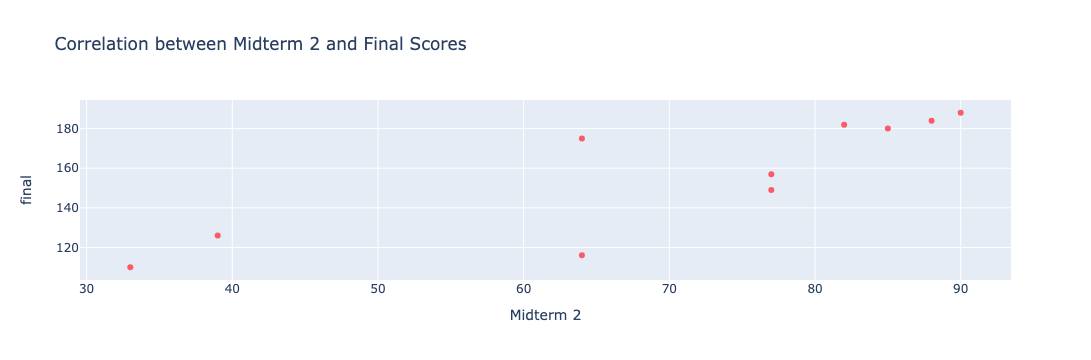

Insight 4: These scatter plots help to understand if there is a correlation between midterm and final exam scores. A strong correlation might suggest that midterms are good predictors of final performance.


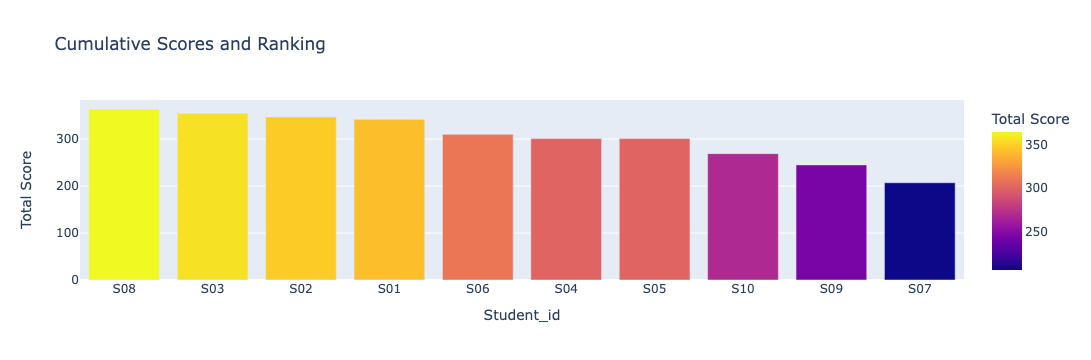

Insight 5: The cumulative bar chart ranks students by their total scores. It's useful for quickly identifying top performers and those who might be struggling overall.


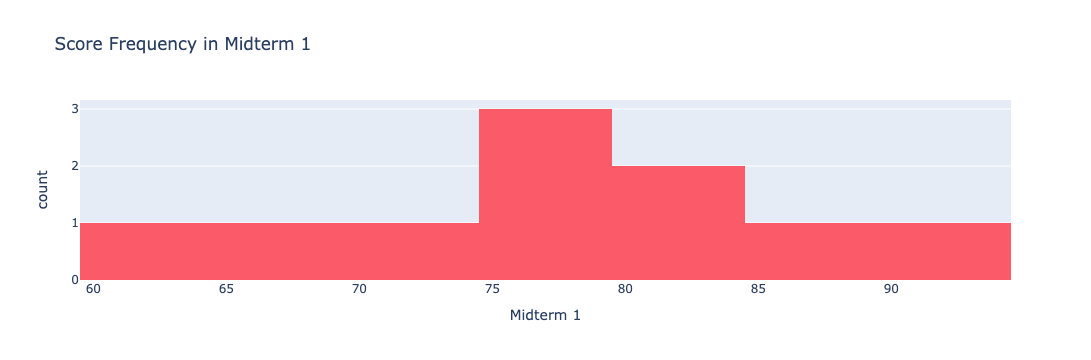

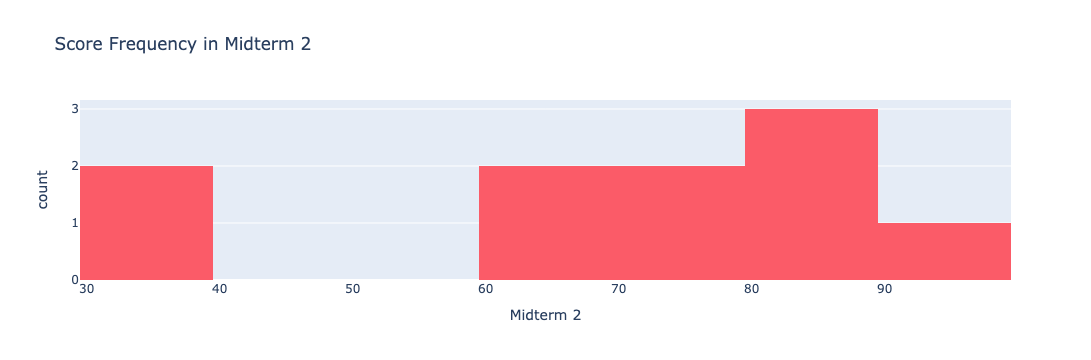

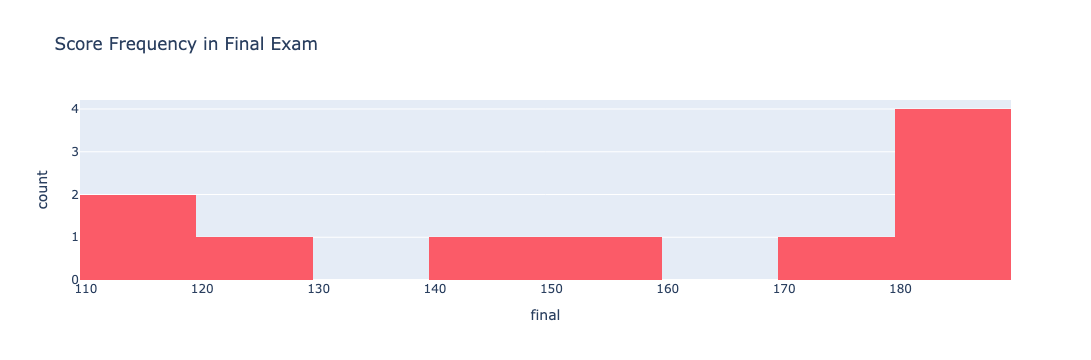

Insight 6: The histograms provide a view of how scores are distributed across different ranges for each exam. This can reveal


In [38]:

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1']

data = pd.read_excel('/Users/mayaravi/Downloads/Exam Stress Final.xlsx')

# Q1: Trend Analysis of Average Scores
avg_scores = data[['Midterm 1', 'Midterm 2', 'final']].mean()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=avg_scores.index, y=avg_scores, mode='lines+markers', name='Average Score'))
fig1.update_layout(title='Trend in Average Scores Across Exams', xaxis_title='Exam', yaxis_title='Average Score')
fig1.update_traces(marker=dict(color=custom_palette[0]))  # Apply custom color
fig1.show()
print("Insight 1: Observe the trend in average scores. An upward trend suggests improving performance, while a downward trend might indicate a need for additional support or review of teaching strategies.")

# Q2: Score Distribution Comparison
fig2 = go.Figure()
fig2.add_trace(go.Box(y=data['Midterm 1'], name='Midterm 1', marker_color=custom_palette[0]))
fig2.add_trace(go.Box(y=data['Midterm 2'], name='Midterm 2', marker_color=custom_palette[1]))
fig2.add_trace(go.Box(y=data['final'], name='Final', marker_color=custom_palette[2]))
fig2.update_layout(title='Comparison of Score Distributions', yaxis_title='Scores')
fig2.show()
print("Insight 2: Examine the box plot for each exam's score distribution. Look for the median, spread, and outliers. Variations might indicate different levels of difficulty or student preparedness.")

# Q3: Performance Improvement Analysis
data['Improvement Mid1 to Mid2'] = data['Midterm 2'] - data['Midterm 1']
data['Improvement Mid2 to Final'] = data['final'] - data['Midterm 2']
fig3 = px.bar(data, x='Student_id', y=['Improvement Mid1 to Mid2', 'Improvement Mid2 to Final'],
              title='Performance Improvement from Midterms to Final', barmode='group', color_discrete_sequence=custom_palette)
fig3.show()
print("Insight 3: The bar chart displays each student's performance change over time. It's useful for identifying who needs more support and who is improving.")

# Q4: Correlation Between Exam Scores
fig4 = px.scatter(data, x='Midterm 1', y='final', title='Correlation between Midterm 1 and Final Scores', color_discrete_sequence=custom_palette)
fig5 = px.scatter(data, x='Midterm 2', y='final', title='Correlation between Midterm 2 and Final Scores', color_discrete_sequence=custom_palette)
fig4.show()
fig5.show()
print("Insight 4: These scatter plots help to understand if there is a correlation between midterm and final exam scores. A strong correlation might suggest that midterms are good predictors of final performance.")

# Q5: Cumulative Scores and Ranking
data['Total Score'] = data['Midterm 1'] + data['Midterm 2'] + data['final']
data_sorted = data.sort_values(by='Total Score', ascending=False)
fig6 = px.bar(data_sorted, x='Student_id', y='Total Score', color='Total Score', title='Cumulative Scores and Ranking', color_discrete_sequence=custom_palette)
fig6.show()
print("Insight 5: The cumulative bar chart ranks students by their total scores. It's useful for quickly identifying top performers and those who might be struggling overall.")

# Q6: Score Frequency Analysis
fig7 = px.histogram(data, x='Midterm 1', nbins=10, title='Score Frequency in Midterm 1', color_discrete_sequence=custom_palette)
fig8 = px.histogram(data, x='Midterm 2', nbins=10, title='Score Frequency in Midterm 2', color_discrete_sequence=custom_palette)
fig9 = px.histogram(data, x='final', nbins=10, title='Score Frequency in Final Exam', color_discrete_sequence=custom_palette)
fig7.show()
fig8.show()
fig9.show()
print("Insight 6: The histograms provide a view of how scores are distributed across different ranges for each exam. This can reveal")


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="research-question-physiological-academic-correlation"></a>
    Research Question - How do physiological measures (EDA, HR, TEMP, IBI) correlate with students' academic performance (Midterm 1, Midterm 2, and the final exam) in the overall student population and within gender groups.
</h3>


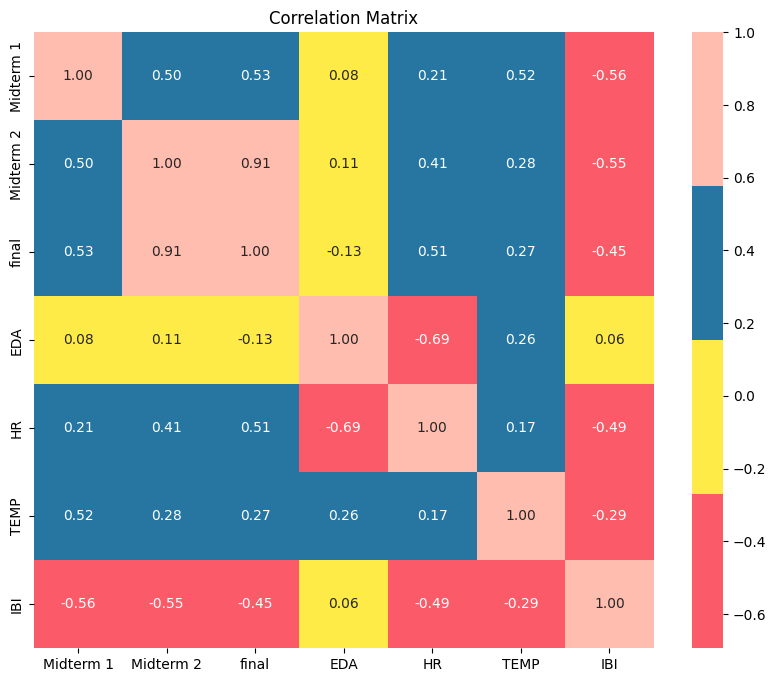

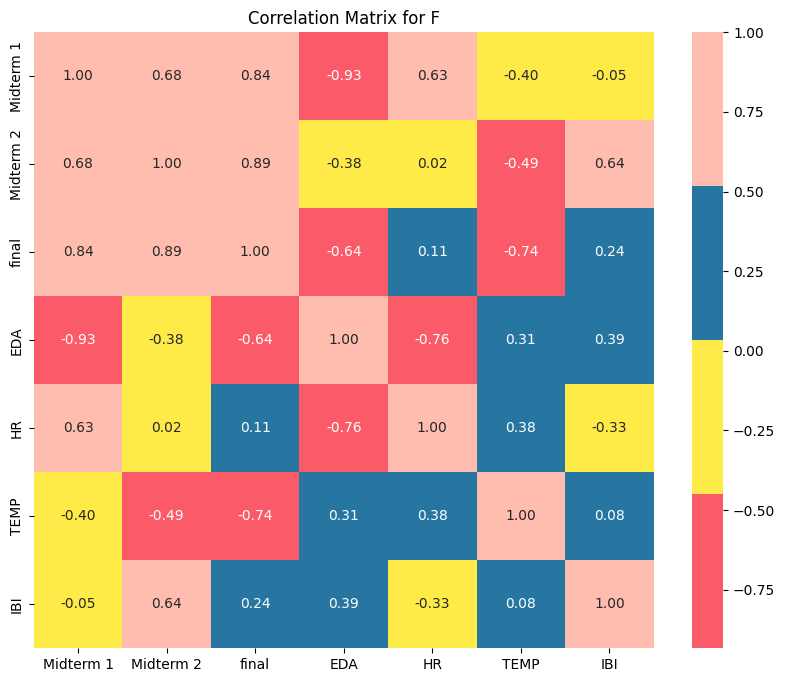

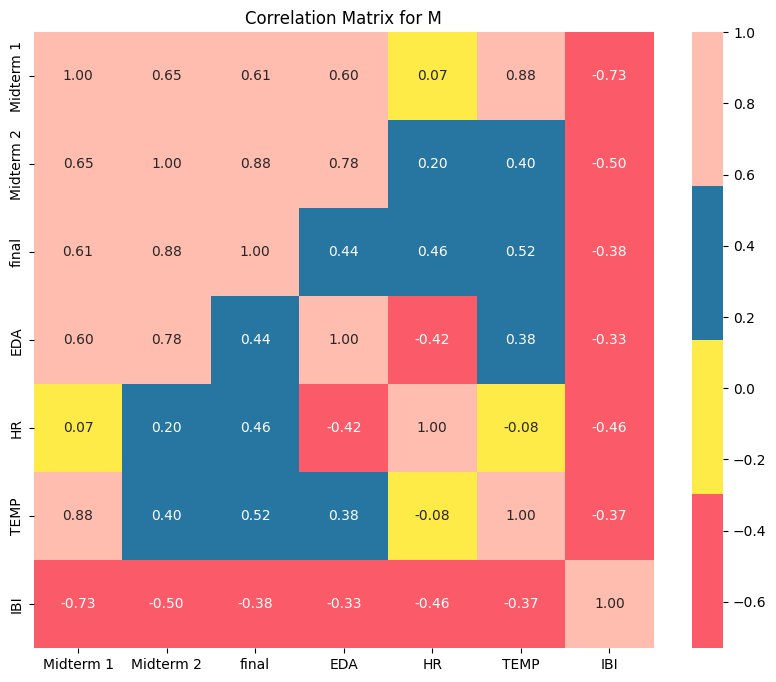

Midterm 1  Midterm 2     final       EDA        HR      TEMP  \
Midterm 1   1.000000   0.681371  0.841813 -0.933773  0.628475 -0.404318   
Midterm 2   0.681371   1.000000  0.893340 -0.376077  0.022355 -0.494287   
final       0.841813   0.893340  1.000000 -0.643938  0.113887 -0.744983   
EDA        -0.933773  -0.376077 -0.643938  1.000000 -0.761315  0.307164   
HR          0.628475   0.022355  0.113887 -0.761315  1.000000  0.383151   
TEMP       -0.404318  -0.494287 -0.744983  0.307164  0.383151  1.000000   
IBI        -0.050248   0.640935  0.239305  0.390694 -0.334255  0.075503   

                IBI  
Midterm 1 -0.050248  
Midterm 2  0.640935  
final      0.239305  
EDA        0.390694  
HR        -0.334255  
TEMP       0.075503  
IBI        1.000000

In [43]:
custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']

def safe_numeric_mean(df, col):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    return df.groupby('Student_id')[col].mean().reset_index()

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'
xls = pd.ExcelFile(file_path)

grades_df = pd.read_excel(xls, sheet_name='Grades')
demography_df = pd.read_excel(xls, sheet_name='Demography')

eda_df = pd.read_excel(xls, sheet_name='EDA')
hr_df = pd.read_excel(xls, sheet_name='HR')
temp_df = pd.read_excel(xls, sheet_name='Temp')
ibi_df = pd.read_excel(xls, sheet_name='IBI')

eda_df['Student_id'] = eda_df['Student_id'].str.pad(width=3, side='left', fillchar='0')
hr_df['Student_id'] = hr_df['Student_id'].str.pad(width=3, side='left', fillchar='0')
temp_df['Student_id'] = temp_df['Student_id'].str.pad(width=3, side='left', fillchar='0')
ibi_df['Student_id'] = ibi_df['Student_id'].str.pad(width=3, side='left', fillchar='0')

eda_avg = safe_numeric_mean(eda_df, 'EDA')
hr_avg = safe_numeric_mean(hr_df, 'HR')
temp_avg = safe_numeric_mean(temp_df, 'TEMP')
ibi_avg = safe_numeric_mean(ibi_df, 'IBI')

merged_df = pd.merge(grades_df, demography_df, on='Student_id', how='inner')
merged_physio_df = pd.merge(merged_df, eda_avg, on='Student_id', how='inner')
merged_physio_df = pd.merge(merged_physio_df, hr_avg, on='Student_id', how='inner')
merged_physio_df = pd.merge(merged_physio_df, temp_avg, on='Student_id', how='inner')
merged_physio_df = pd.merge(merged_physio_df, ibi_avg, on='Student_id', how='inner')

merged_physio_df['final'] = merged_physio_df['final'] / 2

correlation_columns = ['Midterm 1', 'Midterm 2', 'final', 'EDA', 'HR', 'TEMP', 'IBI']
correlation_data = merged_physio_df[correlation_columns]

correlation_matrix = correlation_data.corr()

# Use your custom palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

def plot_correlation_by_demographic(df, group, group_name):
    # Filter the dataset for the specific demographic group
    filtered_df = df[df[group] == group_name]
    
    correlation_matrix = filtered_df[correlation_columns].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
    plt.title(f"Correlation Matrix for {group_name}")
    plt.show()
    
    return correlation_matrix

gender_groups = merged_physio_df['Gender'].unique()
correlation_matrices_gender = {}

for gender in gender_groups:
    correlation_matrices_gender[gender] = plot_correlation_by_demographic(merged_physio_df, 'Gender', gender)

(correlation_matrices_gender[gender_groups[0]])


<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="exam-hours-stress-correlation"></a>
    Research Question - Does longer exam hours mean more stress in students?
</h3>


Average EDA for final: 0.24737760799294742
Average EDA for midterm 1: 0.27034695963208993
Average EDA for midterm 2: 0.2735124131082423


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/505604635.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




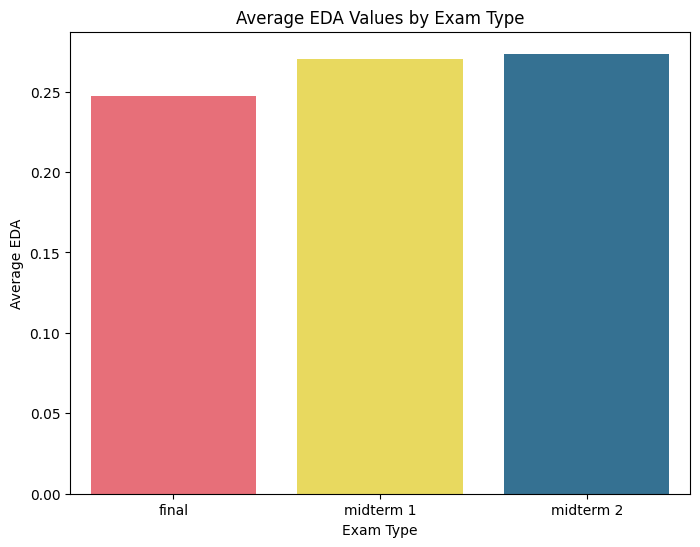

/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/505604635.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




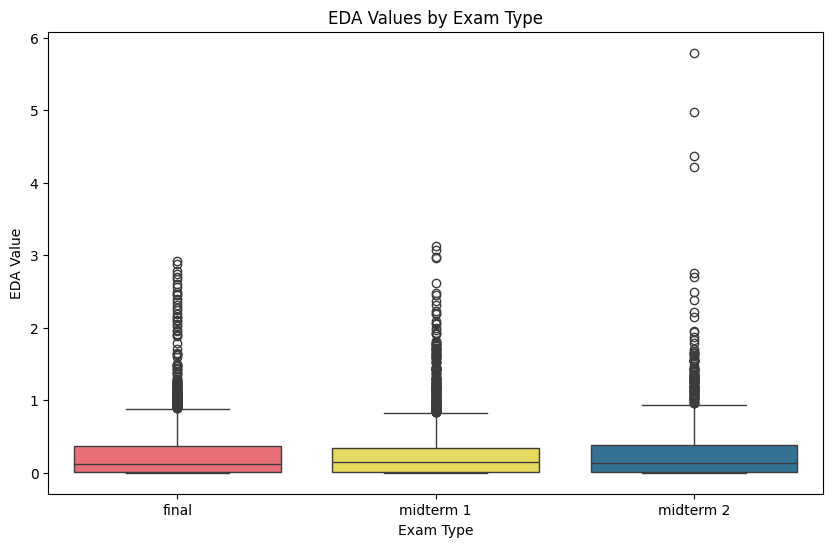

ANOVA Test Result: F-statistic = 3.7245708928576033, p-value = 0.02416886288570926


In [54]:
import scipy.stats as stats

eda_df = pd.read_excel(file_path, sheet_name='EDA')

non_string_values = eda_df[eda_df['Exam'].apply(lambda x: not isinstance(x, str))]

eda_df.dropna(inplace=True)

eda_df['EDA'] = pd.to_numeric(eda_df['EDA'], errors='coerce')

eda_df.dropna(subset=['EDA'], inplace=True)

final_exam_subset = eda_df[eda_df['Exam'] == 'final']

non_numeric_in_final = final_exam_subset[pd.to_numeric(final_exam_subset['EDA'], errors='coerce').isna()]

unique_exams = eda_df['Exam'].unique()

mean_eda_per_exam = {}

for exam in unique_exams:
    exam_subset = eda_df[eda_df['Exam'] == exam]
    mean_eda = exam_subset['EDA'].mean()
    mean_eda_per_exam[exam] = mean_eda

for exam, mean_eda in mean_eda_per_exam.items():
    print(f"Average EDA for {exam}: {mean_eda}")

mean_eda_df = pd.DataFrame(list(mean_eda_per_exam.items()), columns=['Exam', 'Average EDA'])

plt.figure(figsize=(8, 6))
custom_colors = ['#FB5B68', '#FFEB48', '#2676A1']
sns.barplot(x='Exam', y='Average EDA', data=mean_eda_df, palette=custom_colors)
plt.title('Average EDA Values by Exam Type')
plt.xlabel('Exam Type')
plt.ylabel('Average EDA')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam', y='EDA', data=eda_df, palette=custom_colors)
plt.title('EDA Values by Exam Type')
plt.xlabel('Exam Type')
plt.ylabel('EDA Value')
plt.show()

# ANOVA test to determine if there are significant differences in EDA values among exams
anova_result = stats.f_oneway(
    eda_df[eda_df['Exam'] == 'final']['EDA'],
    eda_df[eda_df['Exam'] == 'midterm 1']['EDA'],
    eda_df[eda_df['Exam'] == 'midterm 2']['EDA']
)

print(f"ANOVA Test Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


<p style="font-size: 17px; color: darkgreen;"><strong>Regarding the ANOVA test results:</strong></p>

<p style="font-size: 17px; color: darkgreen;">The statistic value is <strong>3.7246</strong></p>
<p style="font-size: 17px; color: darkgreen;">The p-value is approximately <strong>0.0242</strong></p>

<p style="font-size: 17px; color: darkgreen;">Since the p-value is less than 0.05, we can conclude that there are statistically significant differences in EDA values among the different exams. This suggests that the stress levels, as indicated by EDA, do vary significantly between the different types of exams.</p>


<h3 style="font-family: garamond; font-size: 25px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left"> Research Question - Analyzing the Relationship Between Stress Levels (as Indicated by EDA) and Student Grades</h3>

<p style="color: #00008B;font-size: 20px">Across Midterm 1, Midterm 2, and the Final Exam, the correlation between EDA and student grades appears to be weak in all cases. Furthermore, the non-significant p-values suggest that these correlations may not be reliable or meaningful, indicating that EDA might not be a strong predictor of student performance on these exams. Further analysis or factors may be needed to better understand and predict student outcomes.</p>


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3012949838.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




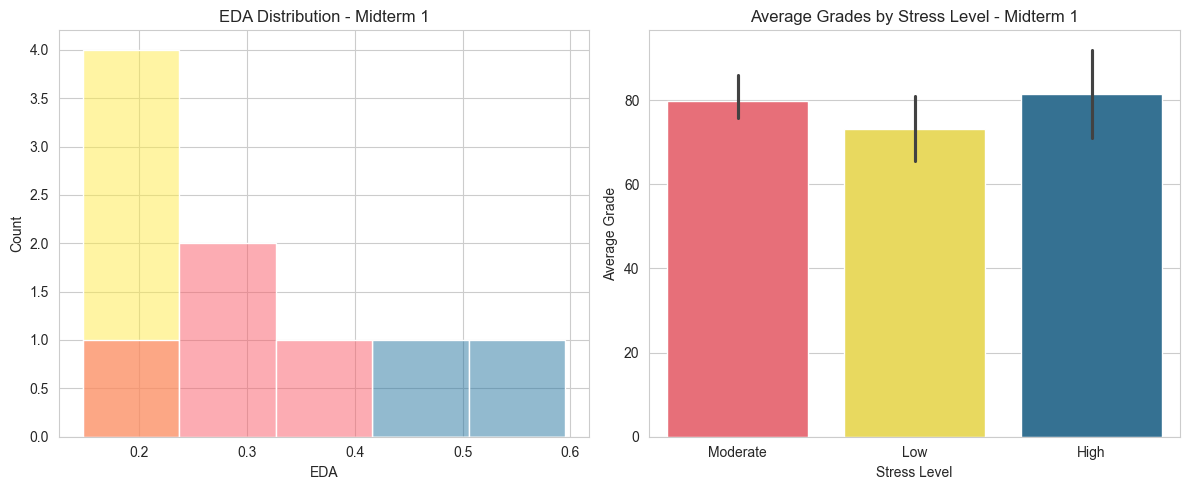

/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3012949838.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Correlation (EDA vs Grades) for Midterm 1:
Correlation Coefficient: 0.11323019673644043, P-value: 0.7554602561405274



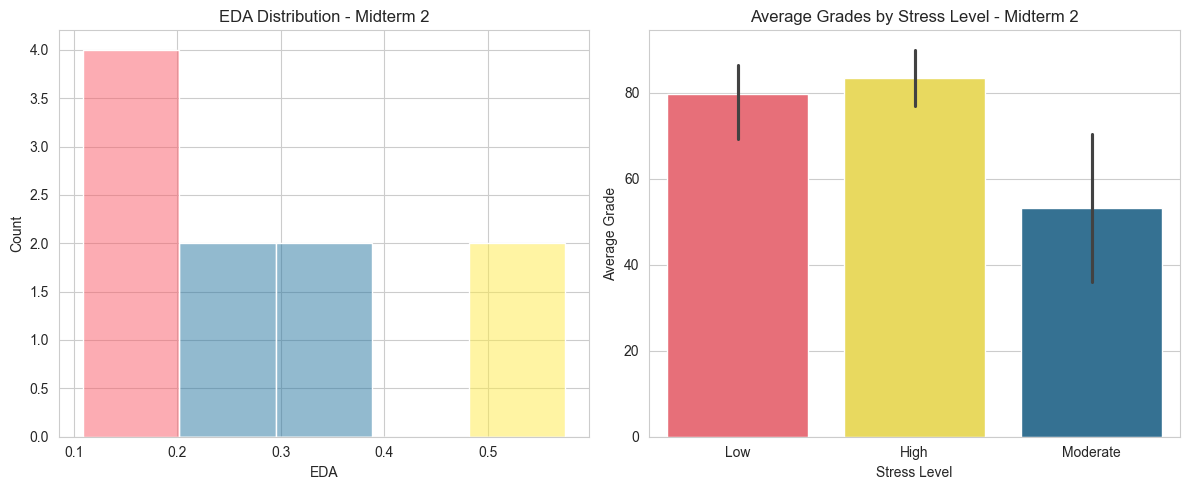

Correlation (EDA vs Grades) for Midterm 2:
Correlation Coefficient: 0.04386943931005438, P-value: 0.9042200744904413



/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/3012949838.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




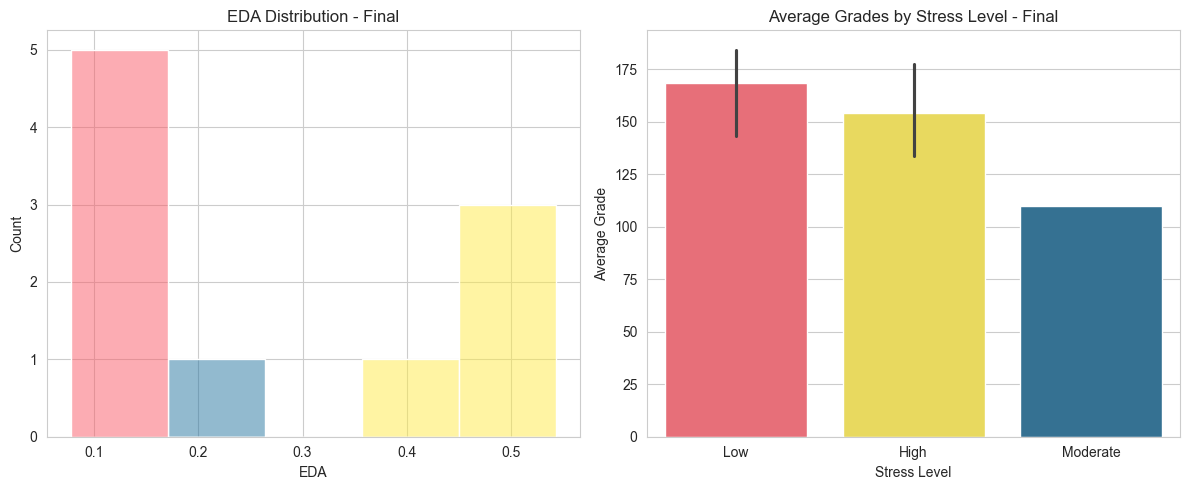

Correlation (EDA vs Grades) for Final:
Correlation Coefficient: -0.07494003328743024, P-value: 0.8369862188564543



In [69]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1']

grades_long = pd.melt(grades_data, id_vars=['Student_id'], 
                      value_vars=['Midterm 1', 'Midterm 2', 'final'],
                      var_name='Exam', value_name='Grade')
grades_long['Exam'] = grades_long['Exam'].str.lower()

avg_eda_exam = eda_data.groupby(['Student_id', 'Exam'])['EDA'].mean().reset_index()

merged_data = pd.merge(grades_long, avg_eda_exam, on=['Student_id', 'Exam'], how='left')

def categorize_stress(eda):
    if eda <= 0.20:
        return 'Low'
    elif eda <= 0.40:
        return 'Moderate'
    else:
        return 'High'

merged_data['Stress_Level'] = merged_data['EDA'].apply(categorize_stress)

for exam in ['midterm 1', 'midterm 2', 'final']:
    exam_data = merged_data[merged_data['Exam'] == exam]

    exam_data = exam_data.dropna(subset=['EDA', 'Grade'])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=exam_data, x='EDA', hue='Stress_Level', palette=custom_palette, legend=False)
    plt.title(f'EDA Distribution - {exam.capitalize()}')
    plt.xlabel('EDA')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.barplot(data=exam_data, x='Stress_Level', y='Grade', palette=custom_palette)
    plt.title(f'Average Grades by Stress Level - {exam.capitalize()}')
    plt.xlabel('Stress Level')
    plt.ylabel('Average Grade')

    plt.tight_layout()
    plt.show()

    corr, p_value = pearsonr(exam_data['EDA'], exam_data['Grade'])
    print(f'Correlation (EDA vs Grades) for {exam.capitalize()}:')
    print(f'Correlation Coefficient: {corr}, P-value: {p_value}\n')



<h3 style="font-family: garamond; font-size: 30px; background-color: white; color: #D9042B; border-radius: 100px 100px; text-align: left">
    <a id="predictive-modelling-machine-learning"></a>
    Predictive modelling and Machine learning
</h3>


<p style="color: #00008B; font-size: 20px">1. How can we effectively predict final exam scores for students using a combination of their physiological data (like EDA, HR, Temp, IBI), demographic data, and midterm scores, and which regression model is most effective for this prediction? </p>

<p style="color: #00008B; font-size: 20px">2. How can we use a decision tree model to analyze and visualize the influence of midterm exam scores on final exam performance, as demonstrated by a dataset containing scores from two midterm exams and the final exam for a group of students?.</p>

<p style="color: #00008B; font-size: 20px">3. How can we find the three students with the most similar grades to a given student using the k-nearest neighbors algorithm? .</p>

<p style="color: #00008B; font-size: 20px">4. Implement a support vector machine (SVM) to classify students into different stress level categories</p>

<p style="color: #00008B; font-size: 20px">5. LSTM Model to identify patterns in heart rate data during exams </p>

<p style="color: #00008B; font-size: 20px">6. How effectively does the LSTM model capture the variability and trends in heart rate data during final exams, and what does the model's performance, indicated by the loss metrics, reveal about the predictability of stress patterns among students during these exams?</p>

<p style="color: #00008B; font-size: 20px">7. ML model to predict the final exam scores of students based on a combination of demographic data (gender, race) and physiological measurements taken during the exams (EDA, HR, TEMP, IBI). The objective is to identify which factors most significantly impact student performance and to compare the effectiveness of Linear Regression and Random Forest models in this prediction task. </p>



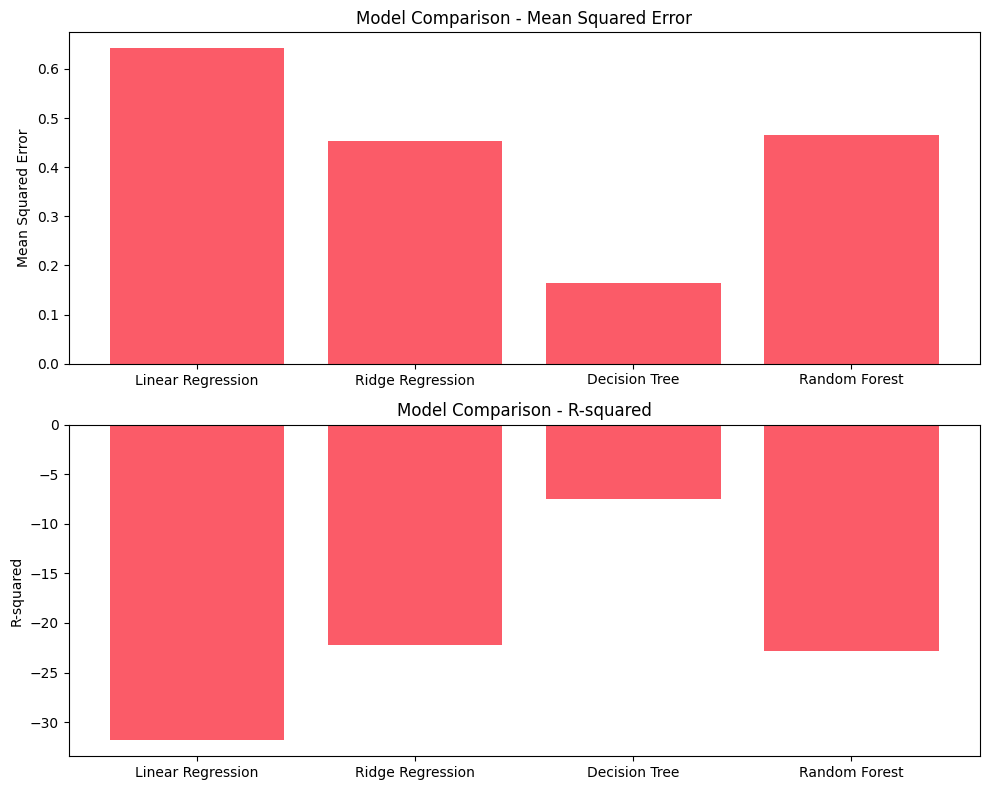

In [47]:
#Q1 -  How can we effectively predict final exam scores for students using a combination of their physiological data (like EDA, HR, Temp, IBI), demographic data, and midterm scores, and which regression model is most effective for this prediction?

custom_palette = ['#FB5B68', '#FFEB48', '#2676A1', '#FFBDB0']

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'  # Adjust the file path
data = pd.read_excel(file_path, sheet_name=None)

grades_data = pd.read_excel(file_path, 'Grades')
demography_data = pd.read_excel(file_path, 'Demography')
eda_data = pd.read_excel(file_path, 'EDA')
hr_data = pd.read_excel(file_path, 'HR')
temp_data = pd.read_excel(file_path, 'Temp')
ibi_data = pd.read_excel(file_path, 'IBI')

physiological_data = pd.concat([
    eda_data.groupby('Student_id')['EDA'].mean(),
    hr_data.groupby('Student_id')['HR'].mean(),
    temp_data.groupby('Student_id')['TEMP'].mean(),
    ibi_data.groupby('Student_id')['IBI'].mean()
], axis=1).reset_index()

combined_data = pd.merge(demography_data, physiological_data, on='Student_id')
combined_data = pd.merge(combined_data, grades_data, on='Student_id')

combined_data.dropna(inplace=True)

# Feature Engineering - Convert DOB to Age
combined_data['Age'] = datetime.now().year - pd.to_datetime(combined_data['DOB']).dt.year

# Encoding categorical variables and dropping non-numeric columns
combined_data['Gender'] = LabelEncoder().fit_transform(combined_data['Gender'])
combined_data['Race'] = LabelEncoder().fit_transform(combined_data['Race'])
combined_data.drop(['Student_id', 'DOB', 'First Name', 'Last Name'], axis=1, inplace=True)

# Normalize/Standardize numerical data
scaler = StandardScaler()
numerical_columns = combined_data.select_dtypes(include=[float, int]).columns.tolist()
combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

# Splitting dataset into features and target variable
X = combined_data.drop('final', axis=1)
y = combined_data['final']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].set_title('Model Comparison - Mean Squared Error')
ax[1].set_title('Model Comparison - R-squared')

for name, metrics in results.items():
    ax[0].bar(name, metrics['MSE'], color=custom_palette)  # Use the custom color palette
    ax[1].bar(name, metrics['R2'], color=custom_palette)   # Use the custom color palette

ax[0].set_ylabel('Mean Squared Error')
ax[1].set_ylabel('R-squared')
plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            font-size: 17px;
            color: #00AA00;
        }

        .result {
            color: #FFEB48;
            font-size: 14px;
        }
    </style>
</head>

<body>
    <h2>Model Evaluation Results</h2>

    <h3>Linear Regression:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.6423</span></p>
    <p>R-squared (R²): <span class="result">-31.8624</span></p>

    <h3>Ridge Regression:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.4534</span></p>
    <p>R-squared (R²): <span class="result">-22.1944</span></p>

    <h3>Decision Tree:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.1653</span></p>
    <p>R-squared (R²): <span class="result">-7.4590</span></p>

    <h3>Random Forest:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.4886</span></p>
    <p>R-squared (R²): <span class="result">-23.9955</span></p>
</body>

</html>


<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            font-size: 17px;
            color: #00AA00;
        }

        .result {
            color: #FFEB48;
            font-size: 14px;
        }
    </style>
</head>

<body>
    <h2>Model Evaluation Results</h2>

    <h3>Linear Regression:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.6423</span></p>
    <p>R-squared (R²): <span class="result">-31.8624</span></p>

    <h3>Ridge Regression:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.4534</span></p>
    <p>R-squared (R²): <span class="result">-22.1944</span></p>

    <h3>Decision Tree:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.1653</span></p>
    <p>R-squared (R²): <span class="result">-7.4590</span></p>

    <h3>Random Forest:</h3>
    <p>Mean Squared Error (MSE): <span class="result">0.4886</span></p>
    <p>R-squared (R²): <span class="result">-23.9955</span></p>
</body>

</html>


<p style="font-size: 17px; color: darkgreen;"><strong>The results from the model training and evaluation are as follows:</strong></p>

<p style="font-size: 17px; color: darkgreen;"><strong>Linear Regression:</strong></p>
<p style="font-size: 17px; color: darkgreen;">Mean Squared Error (MSE): <font color='#FFEB48'>0.6423</font></p>
<p style="font-size: 17px; color: darkgreen;">R-squared (R²): <font color='#FFEB48'>-31.8624</font></p>

<p style="font-size: 17px; color: darkgreen;"><strong>Ridge Regression:</strong></p>
<p style="font-size: 17px; color: darkgreen;">Mean Squared Error (MSE): <font color='#FFEB48'>0.4534</font></p>
<p style="font-size: 17px; color: darkgreen;">R-squared (R²): <font color='#FFEB48'>-22.1944</font></p>

<p style="font-size: 17px; color: darkgreen;"><strong>Decision Tree:</strong></p>
<p style="font-size: 17px; color: darkgreen;">Mean Squared Error (MSE): <font color='#FFEB48'>0.1653</font></p>
<p style="font-size: 17px; color: darkgreen;">R-squared (R²): <font color='#FFEB48'>-7.4590</font></p>

<p style="font-size: 17px; color: darkgreen;"><strong>Random Forest:</strong></p>
<p style="font-size: 17px; color: darkgreen;">Mean Squared Error (MSE): <font color='#FFEB48'>0.4886</font></p>
<p style="font-size: 17px; color: darkgreen;">R-squared (R²): <font color='#FFEB48'>-23.9955</font></p>

<p style="font-size: 17px; color: darkgreen;">The negative R² values for all models indicate that they may not be suitable for this dataset, or the dataset itself might not be suitable for regression analysis in its current form.</p>
<p style="font-size: 17px; color: darkgreen;">The Decision Tree has the lowest MSE, but its negative R² value still indicates poor model performance.</p>


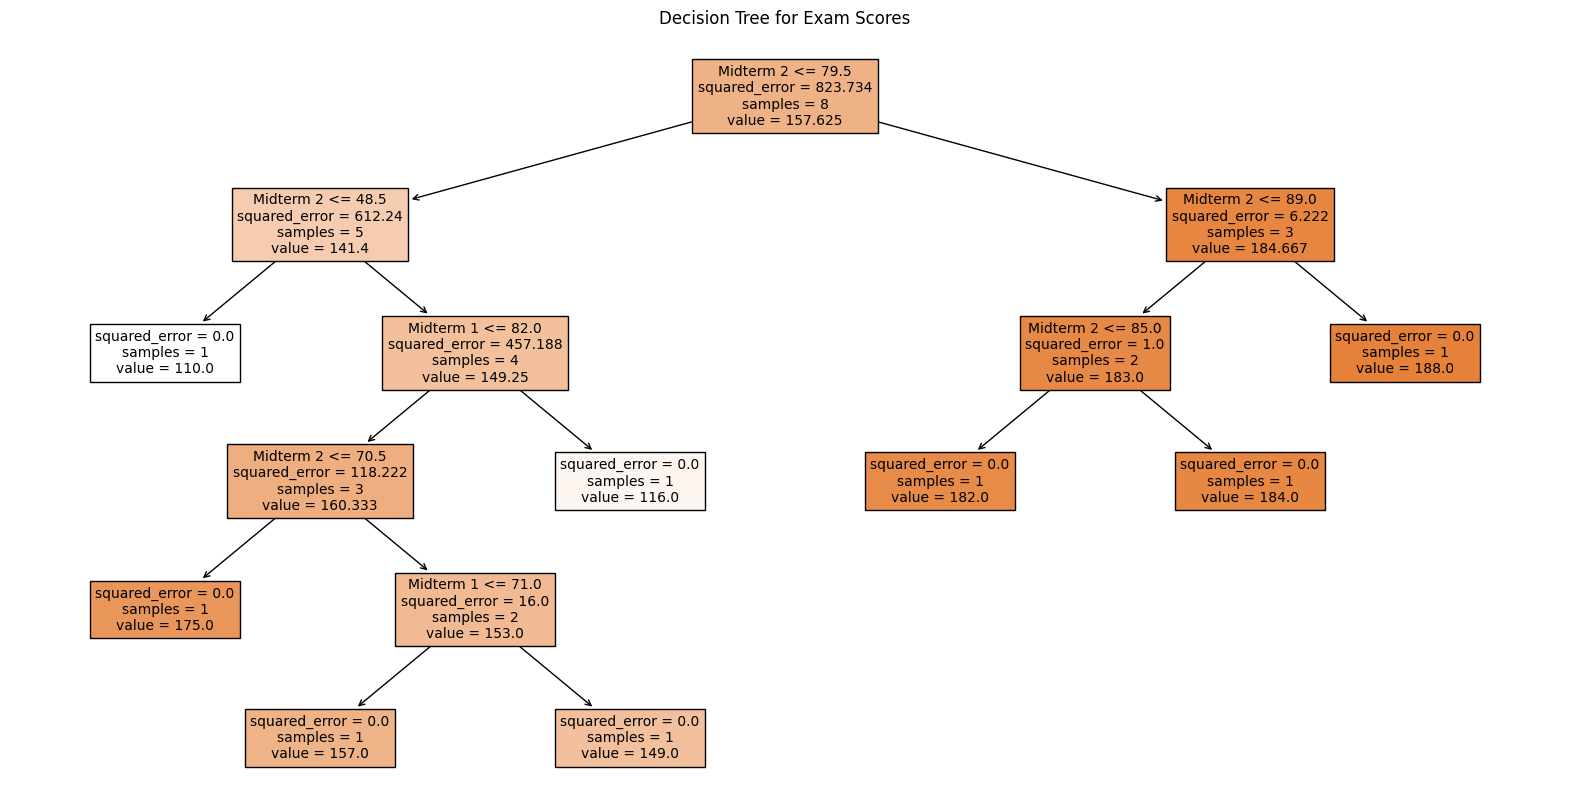

In [50]:
#Q2 - How can we use a decision tree model to analyze and visualize the influence of midterm exam scores on final exam performance, as demonstrated by a dataset containing scores from two midterm exams and the final exam for a group of students?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'
grades_data = pd.read_excel(file_path, sheet_name='Grades')

# Splitting the data into features and target variable
X = grades_data[['Midterm 1', 'Midterm 2']]
y = grades_data['final']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the decision tree regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_regressor, filled=True, feature_names=list(X.columns), fontsize=10)
plt.title("Decision Tree for Exam Scores")
plt.show()


In [51]:
#Q3 - How can we find the three students with the most similar grades to a given student using the k-nearest neighbors algorithm? 
#The data consists of grades for three exams (Midterm 1, Midterm 2, and Final) for a set of students. The goal is to use the k-nearest neighbors algorithm with 
#k=3 to find the three students whose grades are most similar to those of the first student in the dataset.
from sklearn.neighbors import NearestNeighbors

grades_df = pd.read_excel(file_path, sheet_name='Grades')

grades_df.columns = [col.strip().replace(" ", "_").lower() for col in grades_df.columns]

grades_knn = grades_df.drop('student_id', axis=1)

grades_knn_np = grades_knn.to_numpy()

# Applying k-NN with k=3
k = 3
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(grades_knn_np)

# Find the 3 nearest neighbors for the first student in the dataset
first_student = grades_knn_np[0].reshape(1, -1)
distances, indices = neigh.kneighbors(first_student)

nearest_neighbors = grades_df.iloc[indices[0]]

print(nearest_neighbors)

  student_id  midterm_1  midterm_2  final
0        S01         78         82    182
1        S02         82         85    180
2        S03         77         90    188


In [52]:
#Q4 - Implement a support vector machine (SVM) to classify students into different stress level categories

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

def standardize_column_names(df):
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
    df.columns = df.columns.str.lower()  # Convert to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    return df

def standardize_student_ids(df, id_column):
    if id_column in df.columns:
        df[id_column] = df[id_column].str.upper().str.zfill(4)
    return df

# Load the data from the Excel file
file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx' 
all_sheets = pd.read_excel(file_path, sheet_name=None)

for sheet_name, sheet_data in all_sheets.items():
    all_sheets[sheet_name] = standardize_column_names(sheet_data)
    all_sheets[sheet_name] = standardize_student_ids(sheet_data, 'student_id')

eda_sheet_name = [name for name in all_sheets if 'eda' in name.lower()][0]
average_eda_cleaned = all_sheets[eda_sheet_name].groupby('student_id')['eda'].mean().reset_index()

low_stress_threshold = average_eda_cleaned['eda'].quantile(0.25)
high_stress_threshold = average_eda_cleaned['eda'].quantile(0.75)

def categorize_stress_level(eda_value):
    if eda_value < low_stress_threshold:
        return 'Low'
    elif eda_value > high_stress_threshold:
        return 'High'
    else:
        return 'Medium'

average_eda_cleaned['stress_level'] = average_eda_cleaned['eda'].apply(categorize_stress_level)

grades_sheet_name = [name for name in all_sheets if 'grades' in name.lower()][0]
grades_data = all_sheets[grades_sheet_name]
student_stress_grades = pd.merge(grades_data, average_eda_cleaned[['student_id', 'stress_level']], on='student_id', how='left')

student_stress_grades.dropna(inplace=True)  # Drop rows with NaN values

features = student_stress_grades[['midterm_1', 'midterm_2', 'final']]
target = student_stress_grades['stress_level']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       1.0
         Low       0.00      0.00      0.00       1.0
      Medium       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/Users/mayaravi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/mayaravi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/mayaravi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/mayaravi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels

<p style="font-size: 17px; color: darkgreen;"><strong>Insight:</strong> The SVM model has been trained and evaluated. However, there are some important points to note:</p>

<ul style="font-size: 17px; color: darkgreen;">
  <li>Accuracy: The model achieved an accuracy of 0.0 on the test set. This indicates that the model did not correctly predict any of the stress levels in the test set.</li>
  
  <li>Classification Report: The precision, recall, and F1-score are all 0 for the classes in the test set. This further confirms that the model's predictions were not accurate for the test samples.</li>
</ul>

<p style="font-size: 17px; color: darkgreen;">This outcome might be due to several factors:</p>

<ul style="font-size: 17px; color: darkgreen;">
  <li>Small Dataset: With only 10 samples, the dataset might be too small to train an effective model. SVMs, like many machine learning models, generally require more data to learn effectively.</li>
  
  <li>Imbalanced Classes: If the stress levels are not evenly distributed, the model may struggle to learn to classify underrepresented classes.</li>
  
  <li>Model Complexity: The choice of kernel and model parameters might not be optimal for this dataset. Exploring different kernels or parameter settings could potentially improve performance.</li>
  
  <li>Feature Relevance: The features used (grades) might not be the most relevant or sufficient predictors for stress levels. Including more relevant features or engineering new features could help.</li>
</ul>


In [56]:
#Q5 - LSTM Model to identify patterns in heart rate data during exams

from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np

hr_df['Student_id'] = hr_df['Student_id'].str.upper().str.zfill(4)

# Assuming we are analyzing the average HR for each minute for all students
# Grouping the data by 'Time in mins' and 'Exam' and calculating the mean HR
grouped_hr_df = hr_df.groupby(['Time in mins', 'Exam'])['HR'].mean().reset_index()

scaler = StandardScaler()
grouped_hr_df['HR'] = scaler.fit_transform(grouped_hr_df[['HR']])

sequence_length = 5

data = grouped_hr_df['HR'].values
data = data.reshape((len(data), 1))  

generator = TimeseriesGenerator(data, data, length=sequence_length, batch_size=1)

# Splitting the data into training and testing sets
X, y = [], []
for i in range(len(generator)):
    x, y_ = generator[i]
    X.append(x)
    y.append(y_)

X = np.array(X).reshape(-1, sequence_length, 1)  # [samples, time steps, features]
y = np.array(y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

model.summary()


Epoch 1/10
697/697 [==============================] - 1s 527us/step - loss: 0.5650
Epoch 2/10
697/697 [==============================] - 0s 512us/step - loss: 0.3337
Epoch 3/10
697/697 [==============================] - 0s 493us/step - loss: 0.2317
Epoch 4/10
697/697 [==============================] - 0s 487us/step - loss: 0.2188
Epoch 5/10
697/697 [==============================] - 0s 504us/step - loss: 0.2199
Epoch 6/10
697/697 [==============================] - 0s 713us/step - loss: 0.2047
Epoch 7/10
697/697 [==============================] - 0s 504us/step - loss: 0.2089
Epoch 8/10
697/697 [==============================] - 0s 496us/step - loss: 0.2039
Epoch 9/10
697/697 [==============================] - 0s 503us/step - loss: 0.1973
Epoch 10/10
697/697 [==============================] - 0s 499us/step - loss: 0.1956
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)     

<p style="font-size: 17px; color: darkgreen;"><strong>Learning Patterns in Heart Rate Data:</strong></p>

<p style="font-size: 17px; color: darkgreen;">The decreasing loss over the epochs suggests that the LSTM model was successfully learning and adapting to the patterns in the heart rate data. LSTM models are particularly adept at capturing temporal dependencies, indicating that the model was likely recognizing how heart rate values change over time in relation to the exam period.</p>


['final' 'Midterm 1' 'Midterm 2']
Epoch 1/10


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/288666097.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3398/3398 [==============================] - 2s 509us/step - loss: 0.0104
Epoch 2/10
3398/3398 [==============================] - 2s 504us/step - loss: 0.0082
Epoch 3/10
3398/3398 [==============================] - 2s 515us/step - loss: 0.0079
Epoch 4/10
3398/3398 [==============================] - 2s 575us/step - loss: 0.0077
Epoch 5/10
3398/3398 [==============================] - 2s 528us/step - loss: 0.0077
Epoch 6/10
3398/3398 [==============================] - 2s 526us/step - loss: 0.0076
Epoch 7/10
3398/3398 [==============================] - 2s 506us/step - loss: 0.0076
Epoch 8/10
3398/3398 [==============================] - 2s 682us/step - loss: 0.0075
Epoch 9/10
3398/3398 [==============================] - 2s 553us/step - loss: 0.0075
Epoch 10/10
3398/3398 [==============================] - 2s 563us/step - loss: 0.0075
Loss for final exam model: 0.007656449917703867
107/107 [==============================] - 0s 418us/step


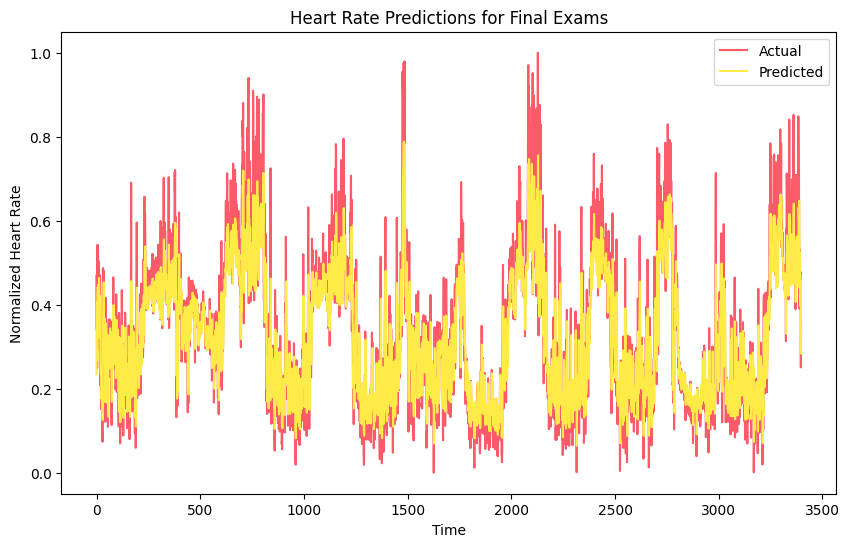

In [57]:
#Q6 - How effectively does the LSTM model capture the variability and trends in heart rate data during final exams, and what does the model's performance, indicated by the loss metrics, reveal about the predictability of stress patterns among students during these exams?

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import matplotlib.pyplot as plt

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'
hr_df = pd.read_excel(file_path, sheet_name='HR')

hr_df['Student_id'] = hr_df['Student_id'].str.upper().str.zfill(4)

print(hr_df['Exam'].unique())

hr_final = hr_df[hr_df['Exam'] == 'final']
hr_midterm = hr_df[hr_df['Exam'] == 'midterm']

scaler = MinMaxScaler()
if not hr_final.empty:
    hr_final['HR'] = scaler.fit_transform(hr_final[['HR']])
if not hr_midterm.empty:
    hr_midterm['HR'] = scaler.fit_transform(hr_midterm[['HR']])

def prepare_data(data, sequence_length):
    if data.empty:
        return np.empty((0, sequence_length, 1)), np.empty((0, 1))
    data_gen = TimeseriesGenerator(data['HR'].values, data['HR'].values,
                                   length=sequence_length, batch_size=1)
    X, y = [], []
    for i in range(len(data_gen)):
        x, y_ = data_gen[i]
        X.append(x)
        y.append(y_)
    return np.array(X).reshape(-1, sequence_length, 1), np.array(y).reshape(-1, 1)

sequence_length = 5

X_final, y_final = prepare_data(hr_final, sequence_length)
X_midterm, y_midterm = prepare_data(hr_midterm, sequence_length)

def build_model(sequence_length):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

if X_final.size > 0:
    model_final = build_model(sequence_length)
    model_final.fit(X_final, y_final, epochs=10, batch_size=1, verbose=1)

if X_midterm.size > 0:
    model_midterm = build_model(sequence_length)
    model_midterm.fit(X_midterm, y_midterm, epochs=10, batch_size=1, verbose=1)

def plot_predictions(model, X, y, title):
    if X.size > 0:
        predictions = model.predict(X)
        plt.figure(figsize=(10, 6))
        plt.plot(y, label='Actual')
        plt.plot(predictions, label='Predicted')
        plt.title(title)
        plt.xlabel('Time')
        plt.ylabel('Normalized Heart Rate')
        plt.legend()
        plt.show()

if X_final.size > 0:
    loss_final = model_final.evaluate(X_final, y_final, verbose=0)
    print(f"Loss for final exam model: {loss_final}")
    plot_predictions(model_final, X_final, y_final, 'Heart Rate Predictions for Final Exams')

if X_midterm.size > 0:
    loss_midterm = model_midterm.evaluate(X_midterm, y_midterm, verbose=0)
    print(f"Loss for midterm exam model: {loss_midterm}")
    plot_predictions(model_midterm, X_midterm, y_midterm, 'Heart Rate Predictions for Midterm Exams')



<p style="font-size: 17px; color: darkgreen;">The loss starts at 0.0102 in the first epoch and decreases to 0.0075 by the tenth epoch. This is a positive sign, indicating that the model is learning effectively from the training data. The model achieves a low loss value, which suggests good training performance.</p>


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/1669896928.py:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/yn/g248wjmx1kngdztbrv5zfr780000gn/T/ipykernel_778/1669896928.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




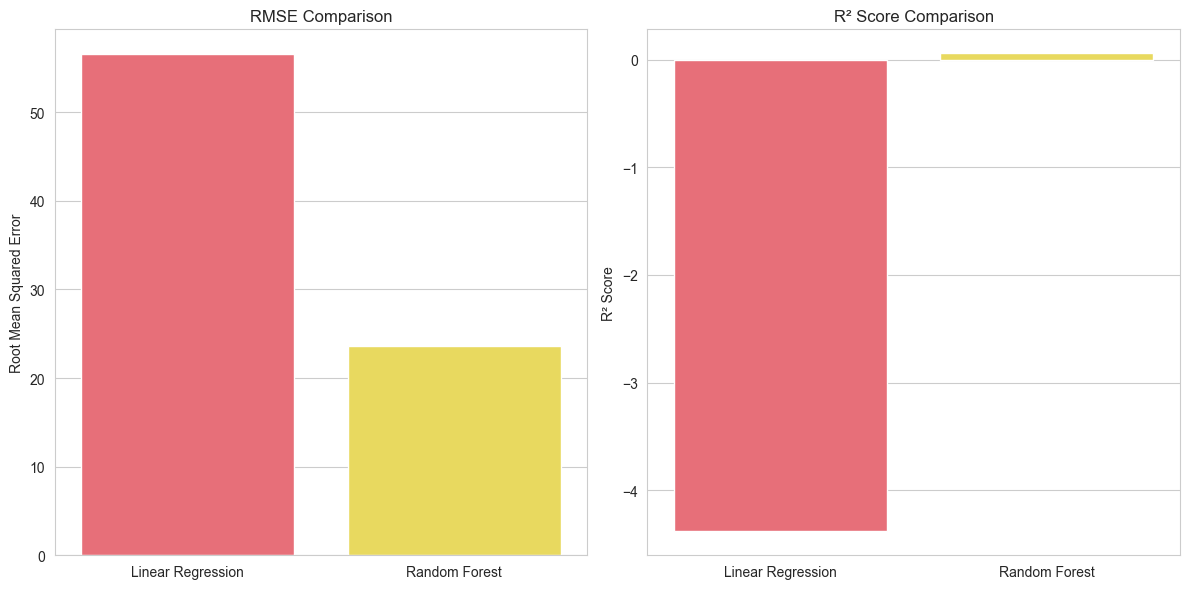

         Feature  Importance
7            IBI    0.266954
4           TEMP    0.236114
0            EDA    0.114914
6   Time in mins    0.063431
1   Time in mins    0.060499
13    Race_White    0.056799
2             HR    0.046264
3   Time in mins    0.043947
10  Race_African    0.039466
5   Time in mins    0.030385


In [71]:
#Q7 - ML model to predict the final exam scores of students based on a combination of demographic data (gender, race) and physiological measurements taken during the exams (EDA, HR, TEMP, IBI). The objective is to identify which factors most significantly impact student performance and to compare the effectiveness of Linear Regression and Random Forest models in this prediction task.

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

custom_palette = ['#FB5B68', '#FFEB48']

excel_file = pd.ExcelFile(file_path)

sheets_data = {sheet: pd.read_excel(excel_file, sheet_name=sheet) for sheet in excel_file.sheet_names}

for sheet in excel_file.sheet_names:
    if 'Student ID' in sheets_data[sheet].columns:
        sheets_data[sheet].rename(columns={'Student ID': 'Student_id'}, inplace=True)
    sheets_data[sheet]['Student_id'] = sheets_data[sheet]['Student_id'].astype(str)
    sheets_data[sheet]['Student_id'] = sheets_data[sheet]['Student_id'].apply(
        lambda x: 'S' + str(int(x.lstrip('S'))) if 'S0' in x else x)

for sheet in excel_file.sheet_names:
    numeric_columns = sheets_data[sheet].select_dtypes(include=['float64', 'int64']).columns
    sheets_data[sheet][numeric_columns] = sheets_data[sheet][numeric_columns].fillna(0)

numeric_cols_eda = sheets_data['EDA'].select_dtypes(include=['float64', 'int64']).columns
numeric_cols_hr = sheets_data['HR'].select_dtypes(include=['float64', 'int64']).columns
numeric_cols_temp = sheets_data['Temp'].select_dtypes(include=['float64', 'int64']).columns
numeric_cols_ibi = sheets_data['IBI'].select_dtypes(include=['float64', 'int64']).columns

eda_agg = sheets_data['EDA'].groupby('Student_id')[numeric_cols_eda].mean()
hr_agg = sheets_data['HR'].groupby('Student_id')[numeric_cols_hr].mean()
temp_agg = sheets_data['Temp'].groupby('Student_id')[numeric_cols_temp].mean()
ibi_agg = sheets_data['IBI'].groupby('Student_id')[numeric_cols_ibi].mean()

physio_data = pd.concat([eda_agg, hr_agg, temp_agg, ibi_agg], axis=1)
demo_data = sheets_data['Demography'].set_index('Student_id')
merged_data = demo_data.join(physio_data)
grades_data = sheets_data['Grades'][['Student_id', 'final']].set_index('Student_id')
final_data = merged_data.join(grades_data)


encoder = OneHotEncoder(sparse_output=False)  
encoded_vars = encoder.fit_transform(final_data[['Gender', 'Race']])

encoded_vars_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(['Gender', 'Race']))
encoded_vars_df.index = final_data.index

final_data_encoded = final_data.join(encoded_vars_df).drop(['DOB', 'First Name', 'Last Name', 'Gender', 'Race'], axis=1)

continuous_imputer = SimpleImputer(strategy='mean')
final_data_encoded_imputed = pd.DataFrame(continuous_imputer.fit_transform(final_data_encoded),
                                          columns=final_data_encoded.columns,
                                          index=final_data_encoded.index)

X = final_data_encoded_imputed.drop('final', axis=1)
y = final_data_encoded_imputed['final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_r2 = r2_score(y_test, lr_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

plt.figure(figsize=(12, 6))

# RMSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=['Linear Regression', 'Random Forest'], y=[lr_rmse, rf_rmse], palette=custom_palette)
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')

# R2 Score Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=['Linear Regression', 'Random Forest'], y=[lr_r2, rf_r2], palette=custom_palette)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Feature Importance Analysis for Random Forest
feature_importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))
